# 1.0 Introduction

The process of methodically collecting and documenting information concerning individuals within a particular populace is referred to as a census. Conducted once every decade on a national scale, the census is a comprehensive undertaking. Its primary objective is to provide a thorough and reliable depiction of the nation's population, encompassing housing situations, as well as demographic, social, and economic attributes. This endeavor aims to amass data about the general population, including but not limited to age, gender, birthplace, marital status, living conditions, educational attainment, employment status, and various other pertinent details.

## 1.1 Data Description

The Census Income Dataset, also known as the "adult income" or the "adult dataset," is based on the 1994 USA Census data. It was extracted by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  The dataset is often used as a benchmark classification and predictive modeling tasks. 

## 1.2 Primary Objective 

The primary objective is to predict whether an individual's annual income exceeds $50,000 or not based on a set of demographic and socioeconomic features. This is a classification problem.

# 2.0 Fetching Data:

## 2.1 Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline   
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 2023
np.random.seed(random_seed_number)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2.2 Import Data

In [2]:
adult_data = pd.read_csv('adult.csv')
adult_data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


**Noticing**: In the workclass and occupation columns there are "?" which shows that there are missing values.

### 2.2.1 Review concise summary of the information

In [3]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# 3.0 Data Cleaning

**Remember**: We observed that in the workclass and occupation columns there are "?" which shows that there are missing values which are represented as non-NAN values.

## 3.1 Fix the non-NaN Values

Since we noticed that the non-Nan values were ?, we will replace the ? with NaNs for easier handling.

In [4]:
# Replace "?" with NaN for easier handling
adult_data.replace("?", np.nan, inplace=True)

## 3.2 Check for Missing Values

In [5]:
adult_data.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
# Count using .sum(), the number of mising values (.isnull()) in each column of df
# as well as the percentages (using .mean()) instead of .sum(). Remember to * 100
# Order them in descending order using sort_values
# Call pd.concat to present these in a single table (Dataframe) with the helpful column names 'count' and '%'

missing_vals_df = pd.concat([adult_data.isnull().sum(), 100 * adult_data.isnull().mean()], axis=1)
missing_vals_df.columns = ['count', '%']
missing_vals_df.sort_values(by = ['count', '%'])

,count,%
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000
gender,0,0.000000
capital-gain,0,0.000000
capital-loss,0,0.000000


**Noticng**: workclass and occupation columns both have around 6% in missing values while native-country has approximately 1.75% in missing values.

In [7]:
# Inspect the shape of that dataframe
adult_data.shape

(48842, 15)

**Noticing**: There are 48842 rows (observations) and 15 columns (features) including target feature (income).

### 3.2.1 Look at the data again - NaN values replaced "?"

In [8]:
adult_data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## 3.3 Replace NaN Values but How?

**Note**: The NaN values are in categorical columns (workcalss, occupation and native-country) and not numerical columns where we could replace the NaNs with mean or median. We are going to replace the NaNs with the mode(Most Common Value).

### 3.3.1 Replace NaNs with The Mode (Most Common Value)

In [9]:
# Impute missing values with the mode
# The [0] index is used to access the first element of the mode result, 
# which is a Series containing the mode(s)
adult_data['workclass'].fillna(adult_data['workclass'].mode()[0], inplace=True)
adult_data['occupation'].fillna(adult_data['occupation'].mode()[0], inplace=True)
adult_data['native-country'].fillna(adult_data['native-country'].mode()[0], inplace=True)

In [10]:
# Check for missing values
adult_data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### 3.3.2 Look at the data again - NaNs replaced by mode

In [11]:
adult_data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## 3.4 Convert Target Feature (income) into Numerical Feature

In [12]:
adult_data['income'] = adult_data['income'].map({'<=50K': 0, '>50K': 1})
adult_data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0


In [13]:
# Check the data type of "income" column
adult_data['income'].dtypes

dtype('int64')

# 4.0 Summary Statistics

## 4.1 Summary Statistics for Numerical Features

In [14]:
# Select numerical features
numerical_features = adult_data.select_dtypes(include=['int64'])
numerical_features.columns.tolist()

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income']

In [15]:
numerical_features.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


## 4.2 Summary Statistics for Categorical Features

In [16]:
# Select categorical features
categorical_features = adult_data.select_dtypes(include=['object'])
categorical_features.columns.tolist()

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [17]:
categorical_features.describe()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


# 5.0 Exploratory Data Analysis

## 5.1 Plot Distribution of Numerical Features

Plotting Distribution of Numerical Features


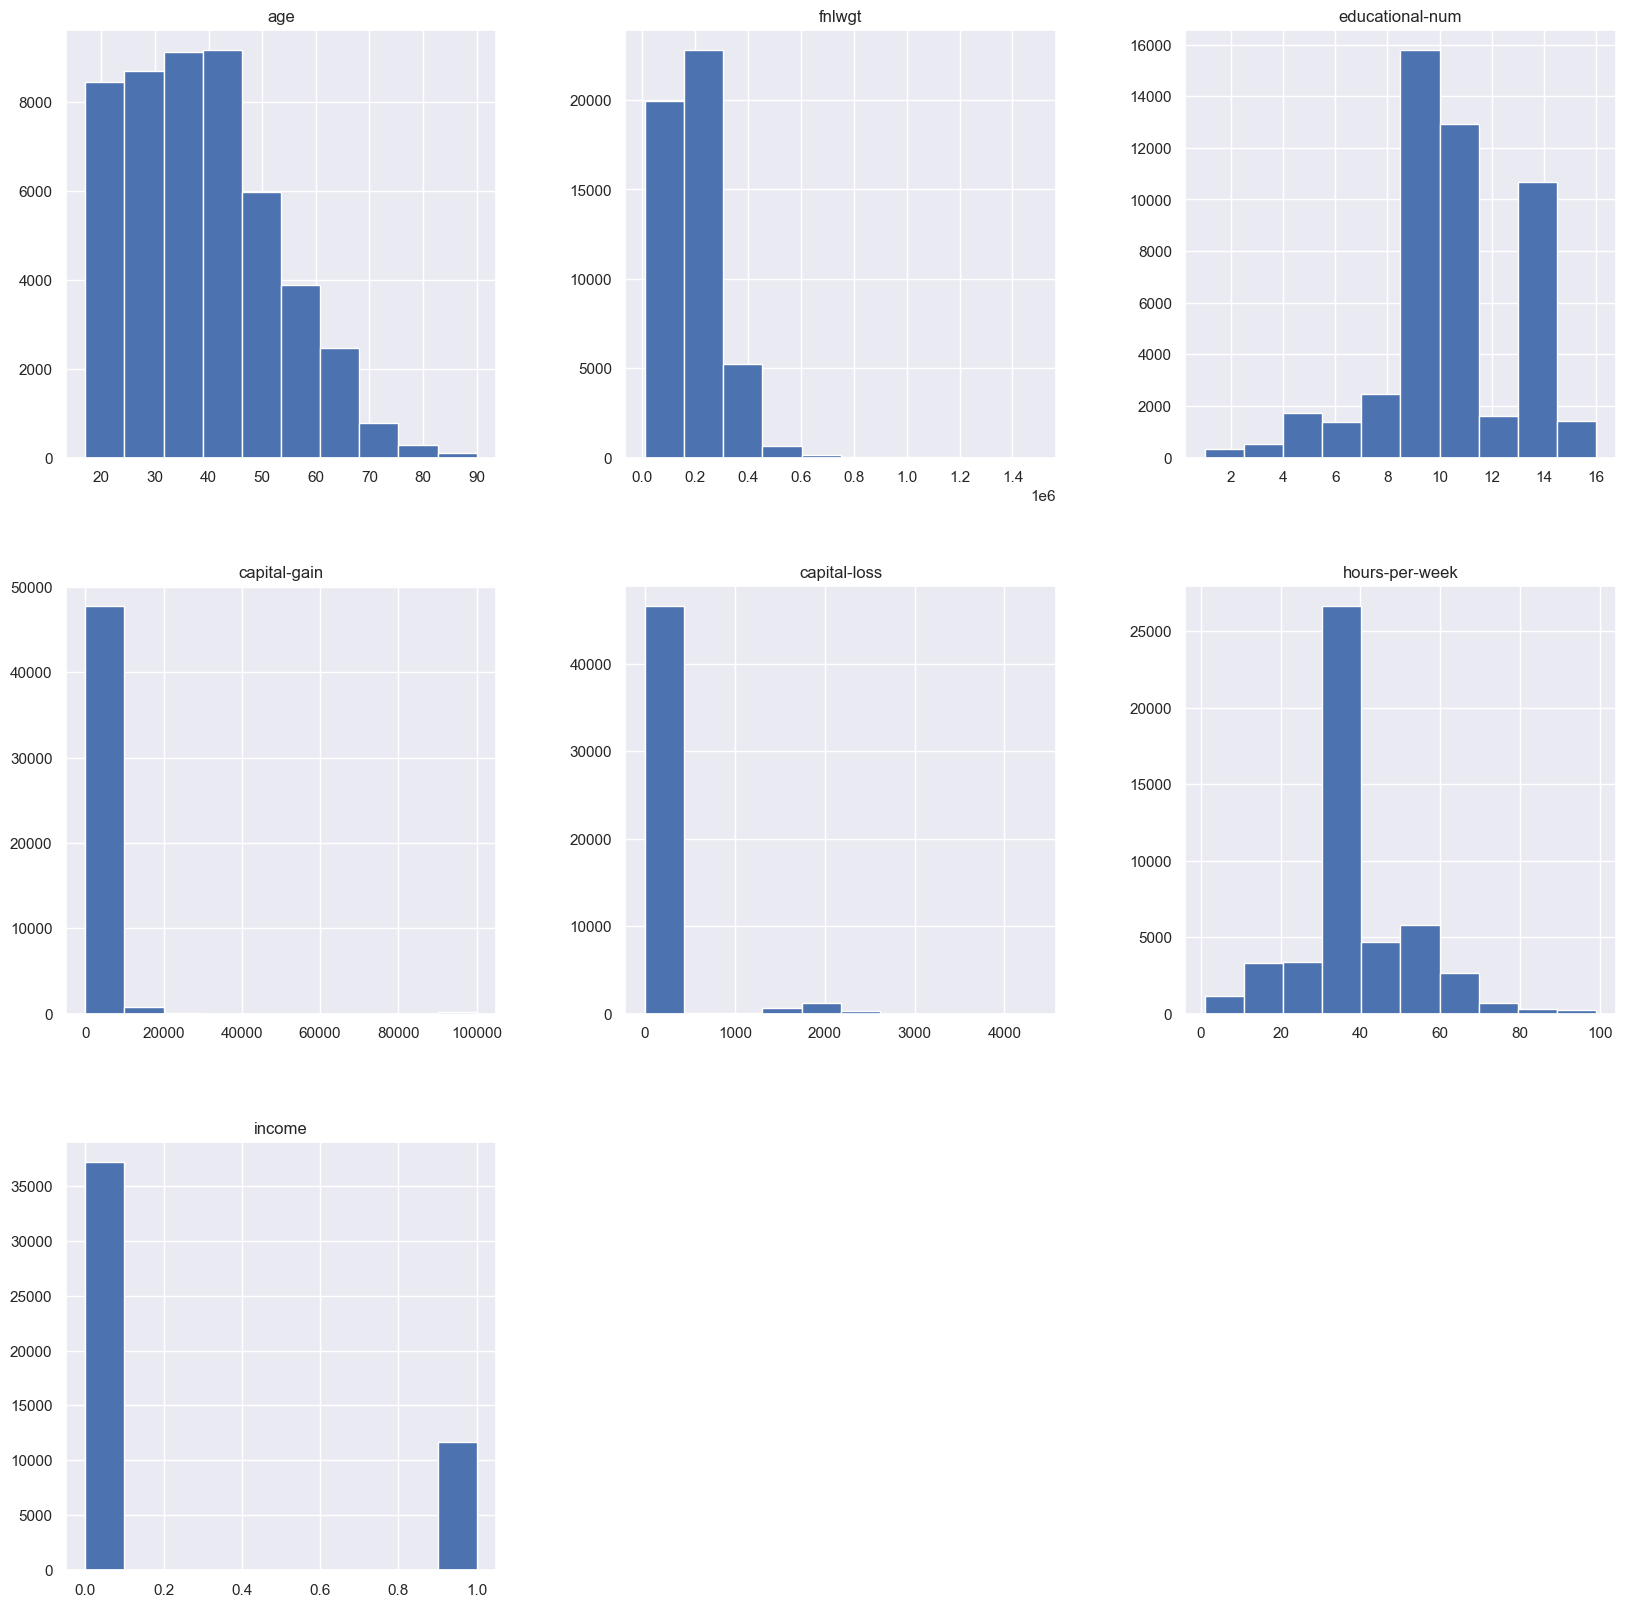

In [18]:
print('Plotting Distribution of Numerical Features')
_= numerical_features.hist(figsize = (20, 20))

In [19]:
# How many individuals are older than 70
adult_data[adult_data['age']>70].shape

(868, 15)

In [20]:
# Captail-loss greater than zero 
adult_data[adult_data["capital-loss"]>0].shape

(2282, 15)

In [21]:
# How many individuals make <=50K
adult_data[adult_data['income']==0].shape

(37155, 15)

In [22]:
# How many individuals make >50K
adult_data[adult_data['income']==1].shape

(11687, 15)

## 5.1.1 Description about Distribution of Numerical Features

**Age**:
 - Age distribution is neither normal nor symmetric.
 - Age exhibits right skewness (positively skewed), concentrating more data points on the left side of the distribution and stretching the right tail.
 - People aged over 70 years are fewer in number.
 
**fnlwgt**:
 - This is the sampling weight corresponding to the observations.
 - The distribution of finalweight is rightly skewed.
 
**educational_num**:
 - Years of education follow a left-skewed distribution, also termed negatively skewed.
 - The left tail (lower values) of the distribution is longer than the right tail (higher values).
 - Data points are concentrated towards the right side of the distribution, with the left tail stretched out.
 
**capital-gain**:
 - Histogram displays "capital-gain" values mostly around 0, with fewer at 10k and 99k.
 - "capital-gain" centers on a specific value, while others spread widely (standard deviation: 7452.01).
 - Indicates either no gain or substantial gain (10k or 99k).
 
**capital-loss**:
 - Histogram reveals "capital-loss" values primarily concentrated at 0, with only 2282 observations exceeding zero.
 
**hours-per-week**:
 - Approximately 27,000 individuals work 30-40 hours weekly.
 - 75% work 45 hours or less per week.
 - 50% work 40 hours or fewer.
 - Fewer work over 80 hours, some under 20 hours weekly.
 
**Income**:
 - 37,155 individuals earn ≤50K, and 11,687 earn >50K.

## 5.2 Description about Plot Distribution of Categorical Features

### 5.2.1 Workclass Distribution

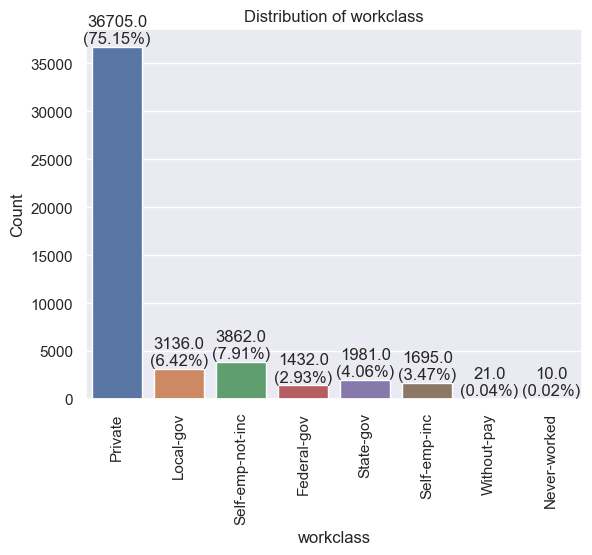

In [23]:
# Create a count plot of workclass using Seaborn
ax = sns.countplot(data=adult_data, x='workclass')
#
# Calculates the total number of entries in the "income" column of the dataset data and convert it into a float. 
total = float(len(adult_data["income"]))
#
# Display count and percentage above each bar
for p in ax.patches:
    count = p.get_height()
    percentage = (count/total)*100
    ax.annotate(f'{count}\n({percentage:.2f}%)',
                # calculates the coordinates at the center of the current bar's width (x), 
                # and at the height of the current bar (y).
                (p.get_x() + p.get_width() / 2., p.get_height()),
                # set horizontal and vertical alignment
                ha='center', va='center',  # No spaces around '='
                # The xytext argument in the annotate function determines,
                # the distance of the annotation text from the top of the bar.
                xytext=(0, 12),  # No spaces around '='
                # The textcoords parameter in the annotate function of Matplotlib 
                # specifies the coordinate system that should be used for interpreting the values provided in the xytext parameter.
                textcoords='offset points')  # No spaces around '='

plt.xlabel('workclass')
plt.ylabel('Count')
plt.title('Distribution of workclass')
# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

### Description about Workclass Distribution

 - There are 8 distinct categories within the workclass feature.
 - The largest category is Private workclass (36705.0) at 75.15%.
 - Categories Without-pay and Never-worked each make up less than 1%.
 - Data is predominantly skewed towards the private workclass.

### 5.2.2 Education Distribution

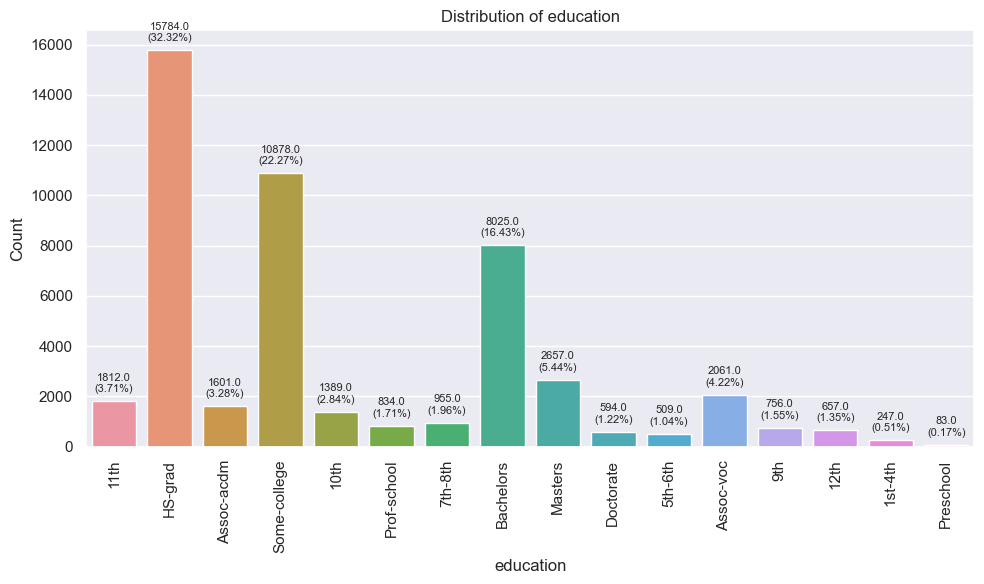

In [24]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a count plot of education using Seaborn
ax = sns.countplot(data=adult_data, x='education')

# Calculates the total number of entries in the "income" column of the dataset data and convert it into a float.
total = float(len(adult_data["income"]))

# Display count and percentage above each bar
for p in ax.patches:
    count = p.get_height()
    percentage = (count/total)*100
    ax.annotate(f'{count}\n({percentage:.2f}%)',
                # calculates the coordinates at the center of the current bar's width (x),
                # and at the height of the current bar (y).
                (p.get_x() + p.get_width() / 2., p.get_height()),
                # set horizontal and vertical alignment
                ha='center', va='bottom',
                # The xytext argument in the annotate function determines,
                # the distance of the annotation text from the top of the bar.
                xytext=(0, 5),  # Adjust the vertical distance as needed
                # The textcoords parameter in the annotate function of Matplotlib
                # specifies the coordinate system that should be used for interpreting the values provided in the xytext parameter.
                textcoords='offset points',
                fontsize=8)  # Adjust the font size as needed

plt.xlabel('education')
plt.ylabel('Count')
plt.title('Distribution of education')
# Rotate x-axis labels
plt.xticks(rotation=90)
# Adjust spacing between bars
plt.tight_layout()  # Add this line to improve spacing
plt.show()

### Description about Education Distribution

- There are 16 unique education categories exist.
- The largest category is HS-grad (15784.0), comprising 32.32%.
- The second largest category is Some-college (10878.0), accounting for 22.27%.
- The third largest category is Bachelors (8025.0), making up 16.43%.
- Preschool and 1st-4th categories combined represent less than 1%.

### 5.2.3 Marital-Status Distribution

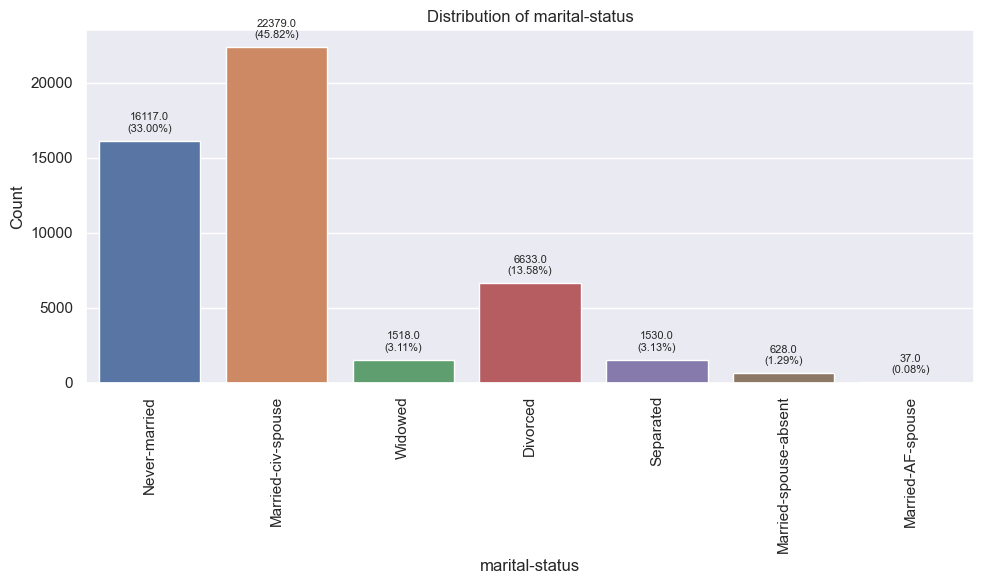

In [25]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a count plot of education using Seaborn
ax = sns.countplot(data=adult_data, x='marital-status')

# Calculates the total number of entries in the "income" column of the dataset data and convert it into a float.
total = float(len(adult_data["income"]))

# Display count and percentage above each bar
for p in ax.patches:
    count = p.get_height()
    percentage = (count/total)*100
    ax.annotate(f'{count}\n({percentage:.2f}%)',
                # calculates the coordinates at the center of the current bar's width (x),
                # and at the height of the current bar (y).
                (p.get_x() + p.get_width() / 2., p.get_height()),
                # set horizontal and vertical alignment
                ha='center', va='bottom',
                # The xytext argument in the annotate function determines,
                # the distance of the annotation text from the top of the bar.
                xytext=(0, 5),  # Adjust the vertical distance as needed
                # The textcoords parameter in the annotate function of Matplotlib
                # specifies the coordinate system that should be used for interpreting the values provided in the xytext parameter.
                textcoords='offset points',
                fontsize=8)  # Adjust the font size as needed

plt.xlabel('marital-status')
plt.ylabel('Count')
plt.title('Distribution of marital-status')
# Rotate x-axis labels
plt.xticks(rotation=90)
# Adjust spacing between bars
plt.tight_layout()  # Add this line to improve spacing
plt.show()

### Description about Marital-Status Distribution

 - There are 7 unique categories present in the marital-status feature.
 - The largest marital-status categories are: 
     - Married-civ-sponse(22379.0 / 45.82%), 
     - Never-married(16117.0/33.0%),
     - Divorced(6633.0/13.58%).

### 5.2.4 Occupation Distribution

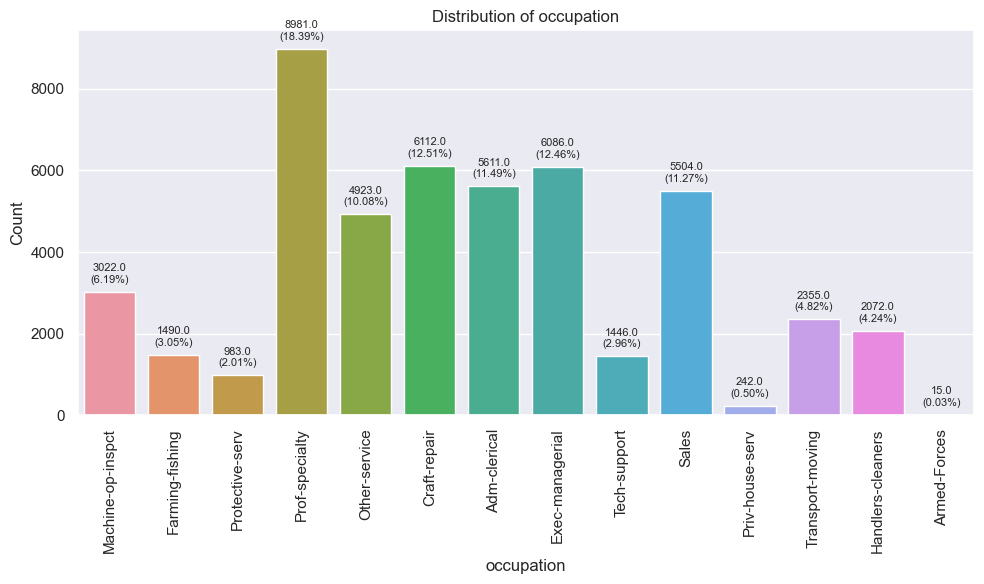

In [26]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a count plot of education using Seaborn
ax = sns.countplot(data=adult_data, x='occupation')

# Calculates the total number of entries in the "income" column of the dataset data and convert it into a float.
total = float(len(adult_data["income"]))

# Display count and percentage above each bar
for p in ax.patches:
    count = p.get_height()
    percentage = (count/total)*100
    ax.annotate(f'{count}\n({percentage:.2f}%)',
                # calculates the coordinates at the center of the current bar's width (x),
                # and at the height of the current bar (y).
                (p.get_x() + p.get_width() / 2., p.get_height()),
                # set horizontal and vertical alignment
                ha='center', va='bottom',
                # The xytext argument in the annotate function determines,
                # the distance of the annotation text from the top of the bar.
                xytext=(0, 5),  # Adjust the vertical distance as needed
                # The textcoords parameter in the annotate function of Matplotlib
                # specifies the coordinate system that should be used for interpreting the values provided in the xytext parameter.
                textcoords='offset points',
                fontsize=8)  # Adjust the font size as needed

plt.xlabel('occupation')
plt.ylabel('Count')
plt.title('Distribution of occupation')
# Rotate x-axis labels
plt.xticks(rotation=90)
# Adjust spacing between bars
plt.tight_layout()  # Add this line to improve spacing
plt.show()

### Description about Occupation Distribution

- 14 unique occupation categories exist.
- The largest occupation category is prof-specialty (8981.0), comprising 18.39%.
- The second largest occupation category is craft-repair (4923.0), accounting for 10.08%.
- The third largest occupation category is exec-managerial (6086.0), making up 12.46%.
- The Armed Forces occupation category represents less than 1%.

### 5.2.5 Relationship Distribution

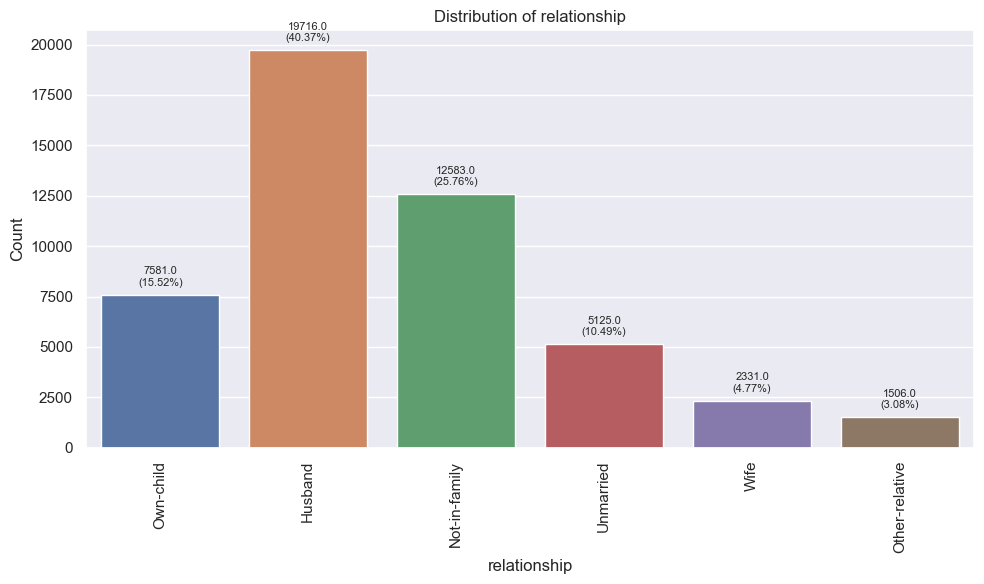

In [27]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a count plot of education using Seaborn
ax = sns.countplot(data=adult_data, x='relationship')

# Calculates the total number of entries in the "income" column of the dataset data and convert it into a float.
total = float(len(adult_data["income"]))

# Display count and percentage above each bar
for p in ax.patches:
    count = p.get_height()
    percentage = (count/total)*100
    ax.annotate(f'{count}\n({percentage:.2f}%)',
                # calculates the coordinates at the center of the current bar's width (x),
                # and at the height of the current bar (y).
                (p.get_x() + p.get_width() / 2., p.get_height()),
                # set horizontal and vertical alignment
                ha='center', va='bottom',
                # The xytext argument in the annotate function determines,
                # the distance of the annotation text from the top of the bar.
                xytext=(0, 5),  # Adjust the vertical distance as needed
                # The textcoords parameter in the annotate function of Matplotlib
                # specifies the coordinate system that should be used for interpreting the values provided in the xytext parameter.
                textcoords='offset points',
                fontsize=8)  # Adjust the font size as needed

plt.xlabel('relationship')
plt.ylabel('Count')
plt.title('Distribution of relationship')
# Rotate x-axis labels
plt.xticks(rotation=90)
# Adjust spacing between bars
plt.tight_layout()  # Add this line to improve spacing
plt.show()

### Description about Relationship Distribution

- 6 unique relationship categories exist.
- The largest relationship category is Husband (19716.0), comprising 40.37%.
- The second largest relationship category is Not-in-family (12583.0), accounting for 25.76%.
- The remaining relationship categories each account for less than 16%.

### 5.2.6 Race Distribution

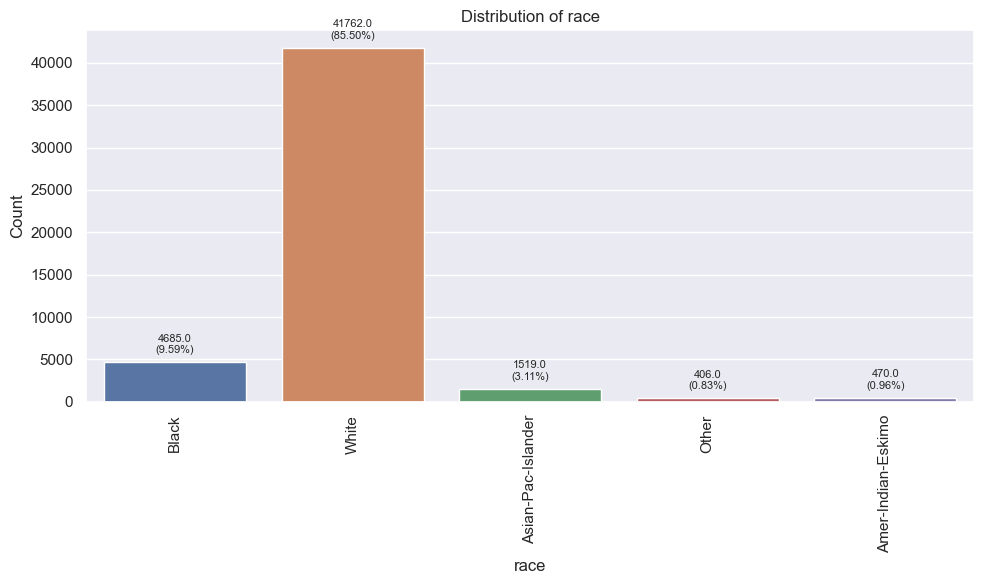

In [28]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a count plot of education using Seaborn
ax = sns.countplot(data=adult_data, x='race')

# Calculates the total number of entries in the "income" column of the dataset data and convert it into a float.
total = float(len(adult_data["income"]))

# Display count and percentage above each bar
for p in ax.patches:
    count = p.get_height()
    percentage = (count/total)*100
    ax.annotate(f'{count}\n({percentage:.2f}%)',
                # calculates the coordinates at the center of the current bar's width (x),
                # and at the height of the current bar (y).
                (p.get_x() + p.get_width() / 2., p.get_height()),
                # set horizontal and vertical alignment
                ha='center', va='bottom',
                # The xytext argument in the annotate function determines,
                # the distance of the annotation text from the top of the bar.
                xytext=(0, 5),  # Adjust the vertical distance as needed
                # The textcoords parameter in the annotate function of Matplotlib
                # specifies the coordinate system that should be used for interpreting the values provided in the xytext parameter.
                textcoords='offset points',
                fontsize=8)  # Adjust the font size as needed

plt.xlabel('race')
plt.ylabel('Count')
plt.title('Distribution of race')
# Rotate x-axis labels
plt.xticks(rotation=90)
# Adjust spacing between bars
plt.tight_layout()  # Add this line to improve spacing
plt.show()

### Description about Race Distribution

- 5 unique race categories exist.
- The largest race category is White (41762.0), comprising 85.50%.
- The second largest race category is Black (12583.0), accounting for 9.59%.
- The third largest race category is Asian-Pacific-Islander (1519.0), making up 3.11%.
- The remaining race categories each represent less than 1%.

### 5.2.7 Gender Distribution

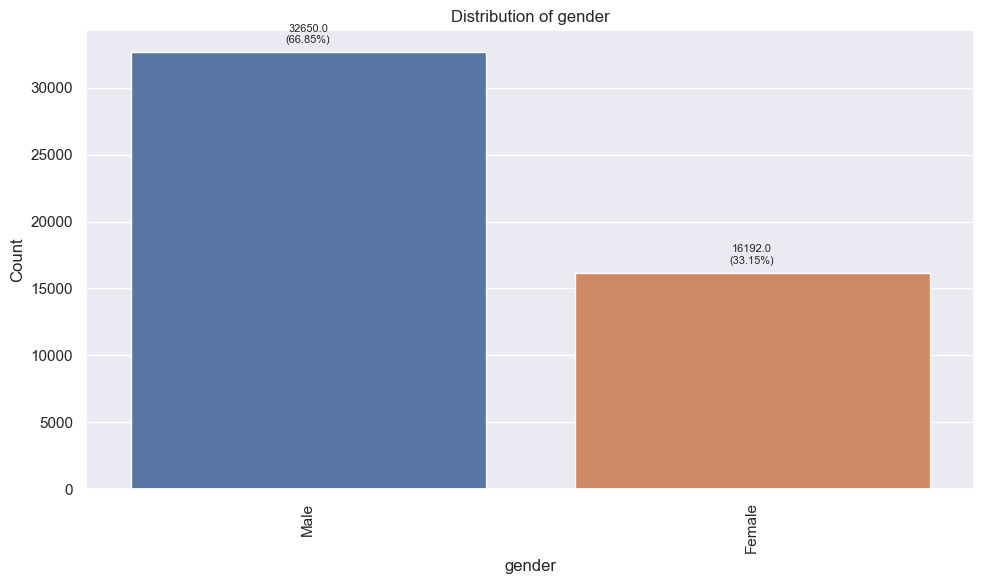

In [29]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a count plot of education using Seaborn
ax = sns.countplot(data=adult_data, x='gender')

# Calculates the total number of entries in the "income" column of the dataset data and convert it into a float.
total = float(len(adult_data["income"]))

# Display count and percentage above each bar
for p in ax.patches:
    count = p.get_height()
    percentage = (count/total)*100
    ax.annotate(f'{count}\n({percentage:.2f}%)',
                # calculates the coordinates at the center of the current bar's width (x),
                # and at the height of the current bar (y).
                (p.get_x() + p.get_width() / 2., p.get_height()),
                # set horizontal and vertical alignment
                ha='center', va='bottom',
                # The xytext argument in the annotate function determines,
                # the distance of the annotation text from the top of the bar.
                xytext=(0, 5),  # Adjust the vertical distance as needed
                # The textcoords parameter in the annotate function of Matplotlib
                # specifies the coordinate system that should be used for interpreting the values provided in the xytext parameter.
                textcoords='offset points',
                fontsize=8)  # Adjust the font size as needed

plt.xlabel('gender')
plt.ylabel('Count')
plt.title('Distribution of gender')
# Rotate x-axis labels
plt.xticks(rotation=90)
# Adjust spacing between bars
plt.tight_layout()  # Add this line to improve spacing
plt.show()

### Description about Gender Distribution

- There are 2 distinct gender categories.
- The Male category is the largest (32650.0), making up 66.85%.
- The Female category constitutes 33.15%, specifically 16192.0.
- The gender distribution is skewed towards males.

### 5.2.8 Native-Country Distribution

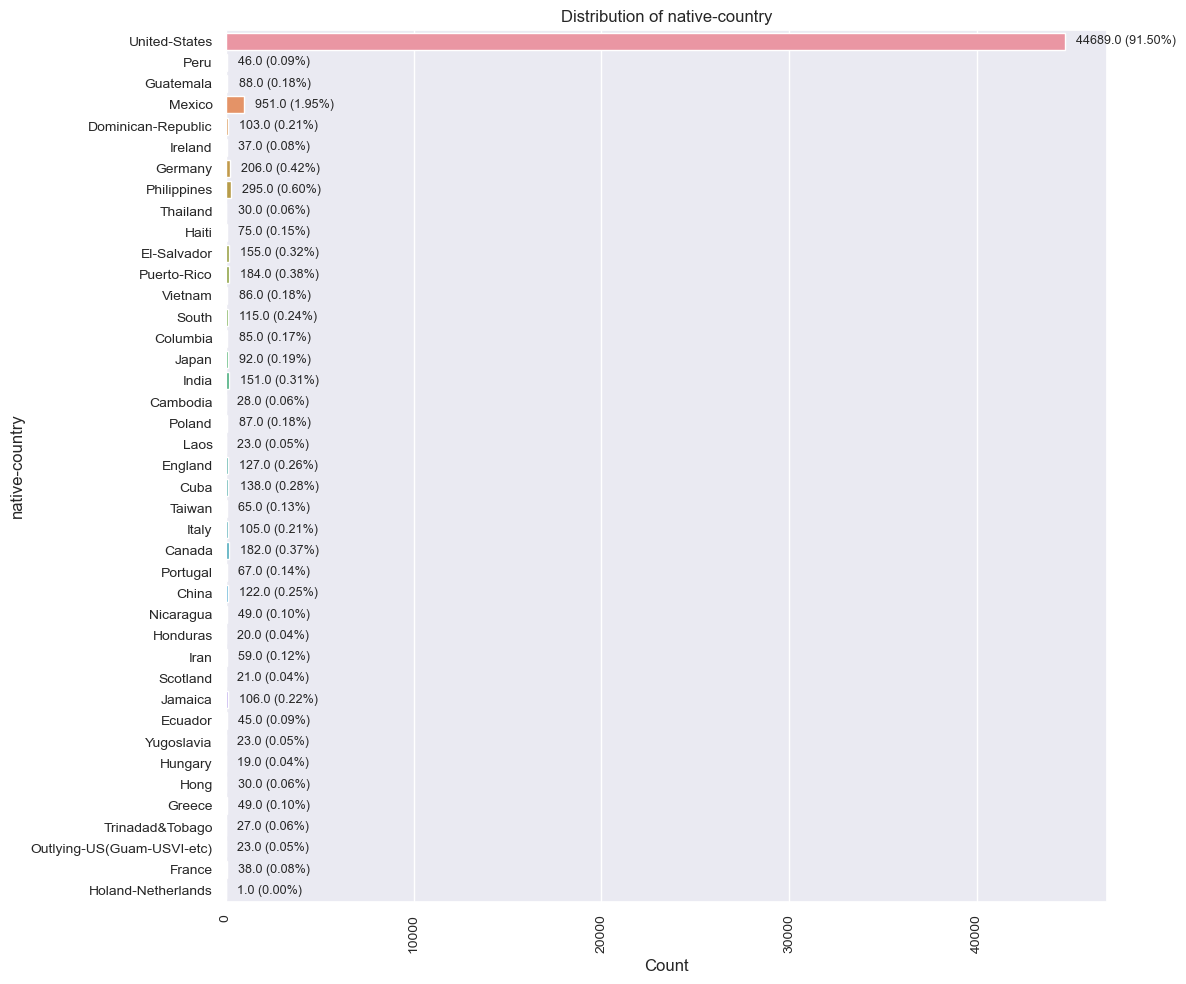

In [30]:
# Set the figure size
plt.figure(figsize=(12, 10))  # Increase the figure size

# Create a count plot of education using Seaborn
ax = sns.countplot(data=adult_data, y='native-country')

# Calculates the total number of entries in the "income" column of the dataset data and convert it into a float.
total = float(len(adult_data["income"]))

# Display count and percentage above each bar
for p in ax.patches:
    count = p.get_width()  # Use get_width() for horizontal bars
    percentage = (count/total)*100
    ax.annotate(f'{count} ({percentage:.2f}%)',  # Combine count and percentage
                # calculates the coordinates at the center of the current bar's width (x),
                # and at the height of the current bar (y).
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),  # Adjust coordinates
                # set horizontal and vertical alignment
                ha='left', va='center',
                # The xytext argument in the annotate function determines,
                # the distance of the annotation text from the top of the bar.
                xytext=(8, 0),  # Adjust the horizontal distance as needed
                # The textcoords parameter in the annotate function of Matplotlib
                # specifies the coordinate system that should be used for interpreting the values provided in the xytext parameter.
                textcoords='offset points',
                fontsize=9)  # Adjust the font size as needed

plt.xlabel('Count')
plt.ylabel('native-country')
plt.title('Distribution of native-country')
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size for x-axis labels
# Adjust font size for y-axis labels
plt.yticks(fontsize=10)
# Adjust spacing between bars
plt.tight_layout()  # Add this line to improve spacing
plt.show()

### Description about Native Country Distribution

- 91.50% of people identify the United States as their native country.
- Immigrants make up 8.5% of the population.
- The largest immigrant group is Mexican, comprising 1.95%.

### 5.3 Multivariate Analysis - Numerical Features

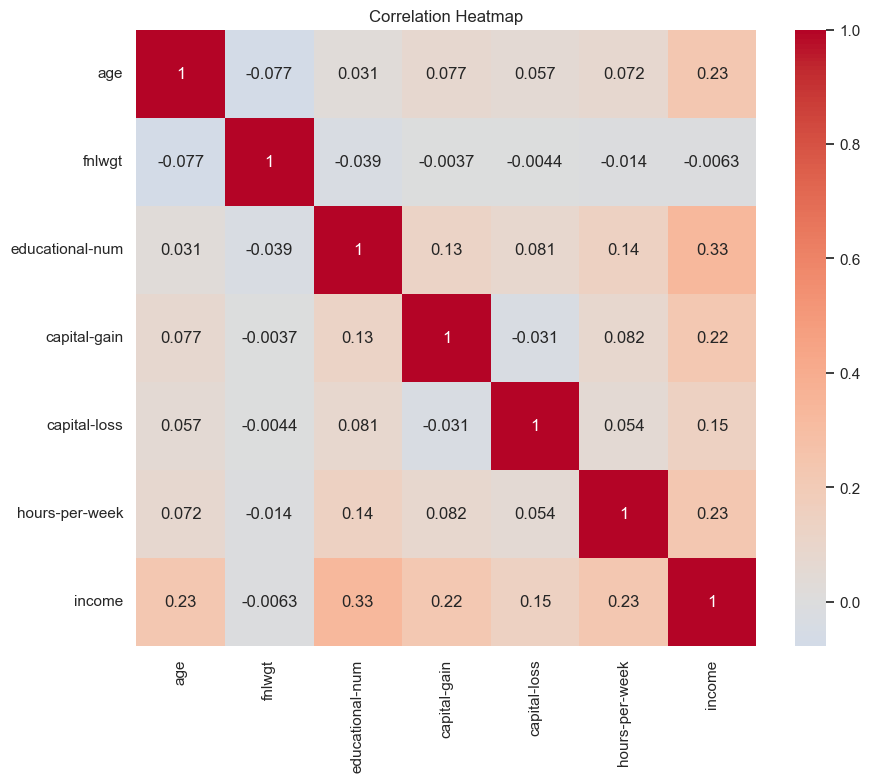

In [31]:
# Calculate Correlationcorrelation_matrix = data.corr()
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### 5.3.1 Description about the Correlation Heatmap

- education-num, age, hours-per-week, capital-gain, and capital-loss have a weak, positive correlation with income.
- fnlwgt has a weak, negative correlation with income.

## 5.4 Bivariate Analysis - Numerical Features

**Please Note**: We will not be conducting a regression analysis or making any comparisons involving "educational-num" and income. This decision is based on the understanding that a more meaningful regression analysis or comparison can be established between "education" and income. This particular comparison aims to determine whether a relationship exists between an individual's level of education (e.g., High School, Bachelor's, Master's, Doctorate, etc.) and their income.

### 5.4.1  Age vs Income

### A. Is there a relationship between the age and income?

    - Are there any visible patterns or trends in the box plot of the two variables?

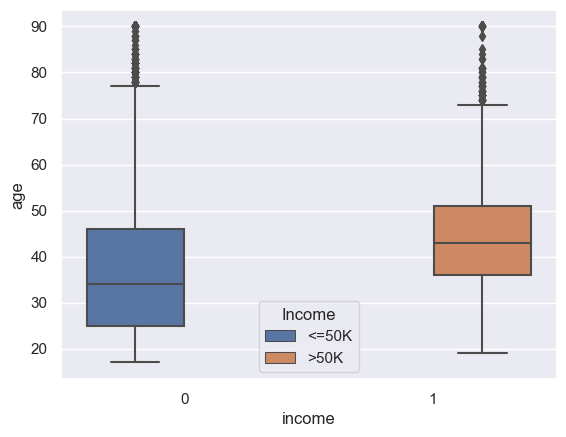

In [32]:
# Custom legend labels to correspond to income groups
legend_labels = ['<=50K', '>50K']

# Create the boxplot
ax = sns.boxplot(x='income', y='age', data=adult_data, hue='income')

# Get the handles(colors) of the bixes and labels for the legend
handles, _ = ax.get_legend_handles_labels()

# Create a custom legend
plt.legend(handles, legend_labels, title='Income')

# Show the plot
plt.show()

In [33]:
# Calculate the median of the <=50K and >50K age distribution
adult_data[['income', 'age']].groupby(['income'], as_index=False).median().sort_values(by='age', ascending=False)

,income,age
1,1,43.0
0,0,34.0


**Noticing**: The median "age" for income group(<=50k) is 34 years while for income group(>50k) is 43 years

- ### Description about the age and income boxplot

    - The boxplot analysis reveals the presence of outliers in both income groups (<=50k and >50k) concerning the variable "age." Notably, the >50k income group exhibits a greater number of outliers in relation to age.

    - When examining the median ages, the income group (<=50k) displays a lower median age falling within the range of 30 to 40 years. Conversely, the income group (>50k) showcases a median age spanning between 40 to 50 years.

    - The interquartile range (IQR) analysis yields the following insights:

        - For the income group (<=50k), the IQR spans from 25 to 46, indicating a substantial range of values within this range.
        - Moreover, it's notable that the middle 50% of ages for the income group earning <=50k are dispersed over a broader range.
        - Conversely, the income group (>50k) exhibits an IQR that ranges from 38 to 51, representing a narrower span of values.

### B. Is there a relationship between the age and income?

    - Does the correlation coefficient suggest a strong, weak, positive, negative,or no linear relationship?

In [34]:
# Select age and income columns
columns = ['age', 'income']
subset = adult_data[columns]
# Calculate the correlation matrix
subset.corr()

,age,income
age,1.000000,0.230369
income,0.230369,1.000000


- ### Description about the age and income correlation matrix
     - The correlation between age and itself is 1.000, which is obvious and expected. Any variable perfectly correlates with itself.

     - The correlation between age and income is 0.230. This positive correlation value indicates a weak positive relationship between age and income. As age increases, there seems to be a tendency for income to also increase, but the correlation is not particularly strong.

### C. Can we use Linear Regression to quantify this relationship and predict income based on changes in age?

In [35]:
from scipy.stats import linregress
# columns = ['age', 'income']
# subset = adult_data[columns]
xs = subset['age']
ys =subset['income']
result = linregress(xs, ys)
print(result)

LinregressResult(slope=0.007168734113547264, intercept=-0.037743823511168895, rvalue=0.23036946784752088, pvalue=0.0, stderr=0.00013702147647696626, intercept_stderr=0.005618383364372551)


- ### Linear Regression Model of age and income


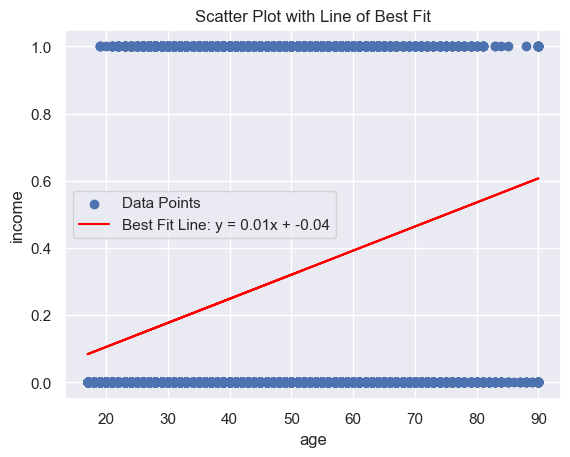

In [36]:
#  Creating a line of best fit for linear regression 
# involves finding the equation of a straight line that 
# best represents the relationship between two variables in a scatter plot.

# Extracting the x and y values
x = adult_data['age']
y = adult_data['income']

# Performing linear regression using numpy's polyfit and 1 degree of freedom
slope, intercept = np.polyfit(x, y, 1)

# Creating the line of best fit equation
line_of_best_fit = f'Best Fit Line: y = {slope:.2f}x + {intercept:.2f}'

# Creating the scatter plot
plt.scatter(x, y, label='Data Points')
plt.plot(x, slope * x + intercept, color='red', label=line_of_best_fit)
plt.xlabel('age')
plt.ylabel('income')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()
plt.grid(True)
plt.show()

- ### Summary of a Linear Regression Analysis on Age and Income

    - The linear regression suggests that there is a statistically significant but relatively weak positive linear relationship between age and income. For each additional year in age, the income tends to increase, but the increase is quite small. The correlation is positive, but other factors might be influencing income to a larger extent.

### 5.4.2 Hours per week vs income

### A. Is there a relationship between the hours per week and income?

    - Are there any visible patterns or trends in the box plot of the two variables?

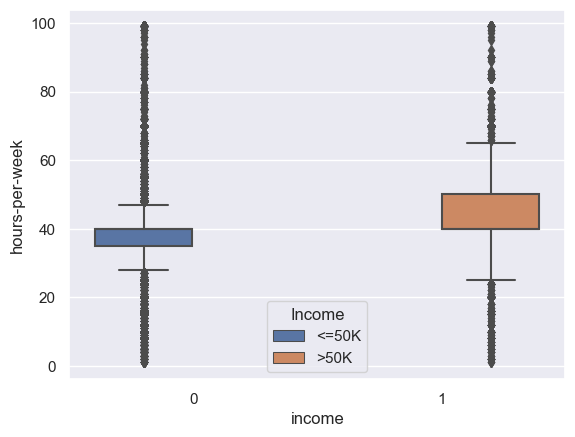

In [37]:
# Custom legend labels to correspond to income groups
legend_labels = ['<=50K', '>50K']

# Create the boxplot
ax = sns.boxplot(x='income', y='hours-per-week', data=adult_data, hue='income')

# Get the handles(colors) of the bixes and labels for the legend
handles, _ = ax.get_legend_handles_labels()

# Create a custom legend
plt.legend(handles, legend_labels, title='Income')

# Show the plot
plt.show()

- ### Description about the hours per week and income boxplot
    - The median "hours-per-week" for Income group who earns >50k is greater than the Income group who earns <=50k.
        - Income group who earns >50k has spend ~45 "hours-per-week".
        - Income group who earns <=50k has spend ~38.5 "hours-per-week".
    - The boxplot for income group who earns <=50k has smaller IQR compared to income group who earns >50k.
        - Income group who earns >50k have flexible working hours
            - A smaller IQR indicates that the middle 50% of the data is less spread out and more tightly clustered around the median.
            - A larger IQR indicates that the middle 50% of the data is more spread out and has a wider distribution.
        - More Outliers present in the Income group who earns <=50k.

### B. Is there a relationship between the hours per week and income?

    - Does the correlation coefficient suggest a strong, weak, positive, negative,or no linear relationship?

In [38]:
# Select hours-per-week and income columns
columns1 = ['hours-per-week', 'income']
subset1 = adult_data[columns1]
# Calculate the correlation matrix
subset1.corr()

,hours-per-week,income
hours-per-week,1.000000,0.227687
income,0.227687,1.000000


- ### Description about the hours per week and income correlation matrix
     - The correlation between hours-per-week and itself is 1.000, which is obvious and expected. Any variable perfectly correlates with itself.

     - The correlation coefficient between "hours-per-week" and "income" is approximately 0.227. This value indicates a positive correlation, but it's a relatively weak correlation.

### C. Can we use Linear Regression to quantify this relationship and predict income based on changes in hours-per-week?

In [39]:
from scipy.stats import linregress
# columns1 = ['hours-per-week', 'income']
# subset1 = adult_data[columns1]
xs = subset1['hours-per-week']
ys =subset1['income']
result = linregress(xs, ys)
print(result)

LinregressResult(slope=0.007839475736487219, intercept=-0.07760852015282094, rvalue=0.22768676056081139, pvalue=0.0, stderr=0.00015170571462892542, intercept_stderr=0.006413965724319832)


- ### Linear Regression Model of hours per week and income


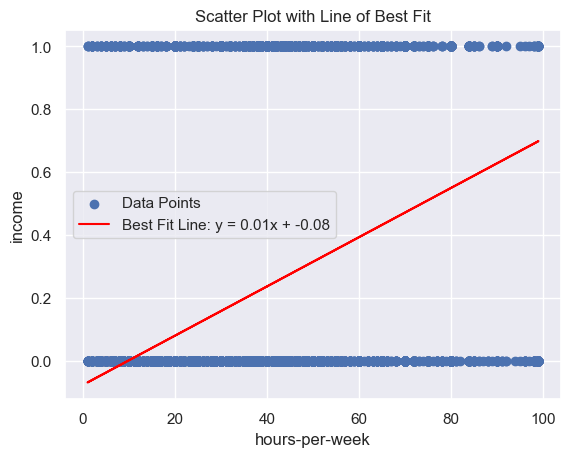

In [40]:
#  Creating a line of best fit for linear regression 
# involves finding the equation of a straight line that 
# best represents the relationship between two variables in a scatter plot.

# Extracting the x and y values
x = adult_data['hours-per-week']
y = adult_data['income']

# Performing linear regression using numpy's polyfit and 1 degree of freedom
slope, intercept = np.polyfit(x, y, 1)

# Creating the line of best fit equation
line_of_best_fit = f'Best Fit Line: y = {slope:.2f}x + {intercept:.2f}'

# Creating the scatter plot
plt.scatter(x, y, label='Data Points')
plt.plot(x, slope * x + intercept, color='red', label=line_of_best_fit)
plt.xlabel('hours-per-week')
plt.ylabel('income')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()
plt.grid(True)
plt.show()

- ### Summary of a Linear Regression Analysis on hours-per-week and income

    - The slope of the regression line is approximately 0.0078, suggesting a positive but weak relationship between the variables. The intercept is around -0.0776. The correlation coefficient (rvalue) is 0.2277, indicating a relatively low correlation. The p-value is very close to 0.0, indicating that the relationship observed is statistically significant. 

### 5.4.3 fnlwgt vs income

### A. Is there a relationship between the fnlwgt and income?

    - Are there any visible patterns or trends in the box plot of the two variables?

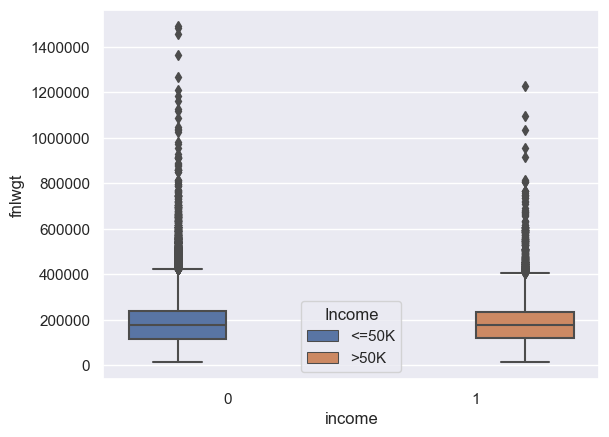

In [41]:
# Custom legend labels to correspond to income groups
legend_labels = ['<=50K', '>50K']

# Create the boxplot
ax = sns.boxplot(x='income', y='fnlwgt', data=adult_data, hue='income')

# Get the handles(colors) of the bixes and labels for the legend
handles, _ = ax.get_legend_handles_labels()

# Create a custom legend
plt.legend(handles, legend_labels, title='Income')

# Format the y-axis tick labels to remove scientific notation
plt.ticklabel_format(style='plain', axis='y')


# Show the plot
plt.show()

- ### Description about the fnlwgt and income boxplot
    - Both income groups have the same median and IQR range.
    - The <=50K income group has more outliers than the >50K income group.

### B. Is there a relationship between fnlwgt and income?

    - Does the correlation coefficient suggest a strong, weak, positive, negative,or no linear relationship?

In [42]:
# Select fnlwgt and income columns
columns2 = ['fnlwgt', 'income']
subset2 = adult_data[columns2]
# Calculate the correlation matrix
subset2.corr()

,fnlwgt,income
fnlwgt,1.000000,-0.006339
income,-0.006339,1.000000


- ### Description about the fnlwgt and income correlation matrix
     - The correlation between fnlwgt and itself is 1.000, which is obvious and expected. Any variable perfectly correlates with itself.

     - The correlation matrix indicates that there is a negligible negative correlation of -0.006339 between "fnlwgt" and "income". This means that as one variable changes, there is a very slight tendency for the other variable to change in the opposite direction, but the relationship is practically insignificant.

### C. Can we use Linear Regression to quantify this relationship and predict income based on changes in fnlwgt?

In [43]:
from scipy.stats import linregress
# columns2 = ['fnlwgt', 'income']
# subset2 = adult_data[columns2]
xs = subset2['fnlwgt']
ys =subset2['income']
result = linregress(xs, ys)
print(result)

LinregressResult(slope=-2.5609542280308635e-08, intercept=0.24413897736748755, rvalue=-0.006338859530113214, pvalue=0.1612498059481073, stderr=1.828075530499064e-08, intercept_stderr=0.003968417494927155)


- ### Linear Regression Model of fnlwgt and income


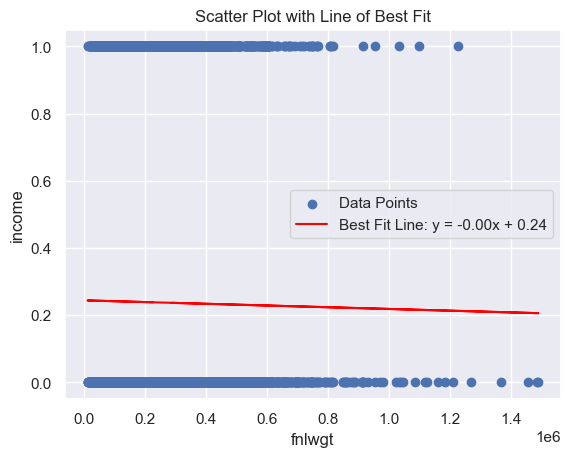

In [44]:
#  Creating a line of best fit for linear regression 
# involves finding the equation of a straight line that 
# best represents the relationship between two variables in a scatter plot.

# Extracting the x and y values
x = adult_data['fnlwgt']
y = adult_data['income']

# Performing linear regression using numpy's polyfit and 1 degree of freedom
slope, intercept = np.polyfit(x, y, 1)

# Creating the line of best fit equation
line_of_best_fit = f'Best Fit Line: y = {slope:.2f}x + {intercept:.2f}'

# Creating the scatter plot
plt.scatter(x, y, label='Data Points')
plt.plot(x, slope * x + intercept, color='red', label=line_of_best_fit)
plt.xlabel('fnlwgt')
plt.ylabel('income')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()
plt.grid(True)
plt.show()

- ### Summary of a Linear Regression Analysis on fnlwgt and income

    - The linear regression analysis suggests that there is a very weak negative relationship between the "fnlwght" and "income". The estimated slope indicates that for a small increase in the independent variable, the dependent variable tends to decrease slightly. 
    - However, the statistical significance of this relationship is uncertain, as the p-value is relatively high(>0.05).

### 5.4.4 capital-gain vs income

### A. Is there a relationship between the capital-gain and income?

    - Are there any visible patterns or trends in the box plot of the two variables?

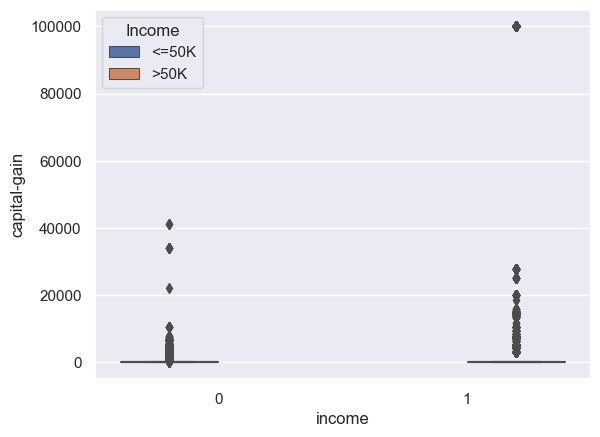

In [45]:
# Custom legend labels to correspond to income groups
legend_labels = ['<=50K', '>50K']

# Create the boxplot
ax = sns.boxplot(x='income', y='capital-gain', data=adult_data, hue='income')

# Get the handles(colors) of the bixes and labels for the legend
handles, _ = ax.get_legend_handles_labels()

# Create a custom legend
plt.legend(handles, legend_labels, title='Income')

# Show the plot
plt.show()

- ### Description about the capital-gain and income boxplot
    - Both income groups have the same median of zero with. This shows that most individuals earn capital-gains of zero.

### B. Is there a relationship between capital-gain and income?

    - Does the correlation coefficient suggest a strong, weak, positive, negative,or no linear relationship?

In [46]:
# Select capital-gain and income columns
columns3 = ['capital-gain', 'income']
subset3 = adult_data[columns3]
# Calculate the correlation matrix
subset3.corr()

,capital-gain,income
capital-gain,1.000000,0.223013
income,0.223013,1.000000


- ### Description about the capital-gain and income correlation matrix
     - The correlation between capital-gain and itself is 1.000, which is obvious and expected. Any variable perfectly correlates with itself.

     - The correlation coefficient between "capital-gain" and "income" is approximately 0.223. This value indicates a weak positive correlation.

### C. Can we use Linear Regression to quantify this relationship and predict income based on changes in capital-gain?

In [47]:
from scipy.stats import linregress
# columns3 = ['capital-gain', 'income']
# subset3 = adult_data[columns3]
xs = subset3['capital-gain']
ys =subset3['income']
result = linregress(xs, ys)
print(result)

LinregressResult(slope=1.276813380236785e-05, intercept=0.2255040858600376, rvalue=0.2230130208582389, pvalue=0.0, stderr=2.5254093720081417e-07, intercept_stderr=0.001901548370505409)


- ### Linear Regression Model of capital-gain and income


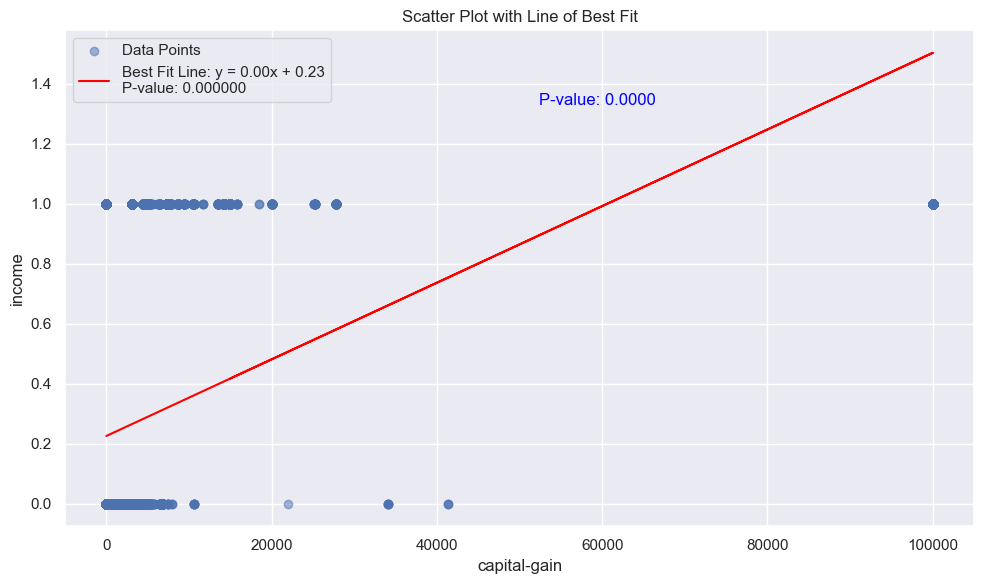

In [48]:
# Extracting the x and y values
x = adult_data['capital-gain']
y = adult_data['income']

# Performing linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Creating the line of best fit equation
line_of_best_fit = f'Best Fit Line: y = {slope:.2f}x + {intercept:.2f}\nP-value: {p_value:.6f}'

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points', alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', label=line_of_best_fit)
plt.xlabel('capital-gain')
plt.ylabel('income')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate the p-value on the top right-hand side of the plot
plt.annotate(f'P-value: {p_value:.4f}', xy=(0.65, 0.85), xycoords='axes fraction', fontsize=12, color='blue', ha='right')

plt.show()

- ### Summary of a Linear Regression Analysis on capital-gain and income
    - The linear regression analysis indicates a positive relationship between the "income" and "capital-gain" variables. For each unit increase in the income, the capital-gain is estimated to increase by approximately 1.28e-05 units. 
    - The positive correlation coefficient of 0.223 suggests a weak positive linear relationship. The very low p-value indicates that this relationship is statistically significant and unlikely to be due to random chance.

### 5.4.5 capital-loss vs income

### A. Is there a relationship between the capital-loss and income?

    - Are there any visible patterns or trends in the box plot of the two variables?

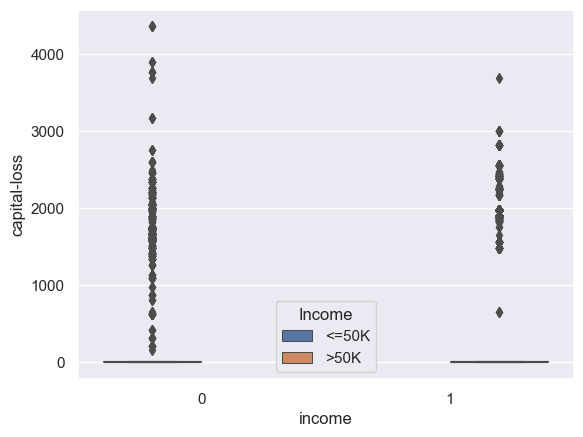

In [49]:
# Custom legend labels to correspond to income groups
legend_labels = ['<=50K', '>50K']

# Create the boxplot
ax = sns.boxplot(x='income', y='capital-loss', data=adult_data, hue='income')

# Get the handles(colors) of the bixes and labels for the legend
handles, _ = ax.get_legend_handles_labels()

# Create a custom legend
plt.legend(handles, legend_labels, title='Income')

# Show the plot
plt.show()

- ### Description about the capital-loss and income boxplot
    - Both income groups have the same median of zero with. This shows that most individuals earn capital-loss of zero.
    - The income group <=50K has capital-loss more outliers than the >50K income group.

### B. Is there a relationship between capital-loss and income?

    - Does the correlation coefficient suggest a strong, weak, positive, negative,or no linear relationship?

In [50]:
# Select capital-loss and income columns
columns4 = ['capital-loss', 'income']
subset4 = adult_data[columns4]
# Calculate the correlation matrix
subset4.corr()

,capital-loss,income
capital-loss,1.000000,0.147554
income,0.147554,1.000000


- ### Description about the capital-loss and income correlation matrix
    - The correlation between "capital loss" and "income" is 0.147554. This indicates a weak positive correlation between these two variables, implying that as "capital loss" increases, there is a slight tendency for "income" to increase as well.

### C. Can we use Linear Regression to quantify this relationship and predict income based on changes in capital-loss?

In [51]:
from scipy.stats import linregress
# columns4 = ['capital-loss', 'income']
# subset4 = adult_data[columns4]
xs = subset4['capital-loss']
ys =subset4['income']
result = linregress(xs, ys)
print(result)

LinregressResult(slope=0.00015621172703277853, intercept=0.22561287816936315, rvalue=0.1475544881993929, pvalue=8.543599059665141e-236, stderr=4.7379814313177935e-06, intercept_stderr=0.001953898957457483)


- ### Linear Regression Model of capital-loss and income

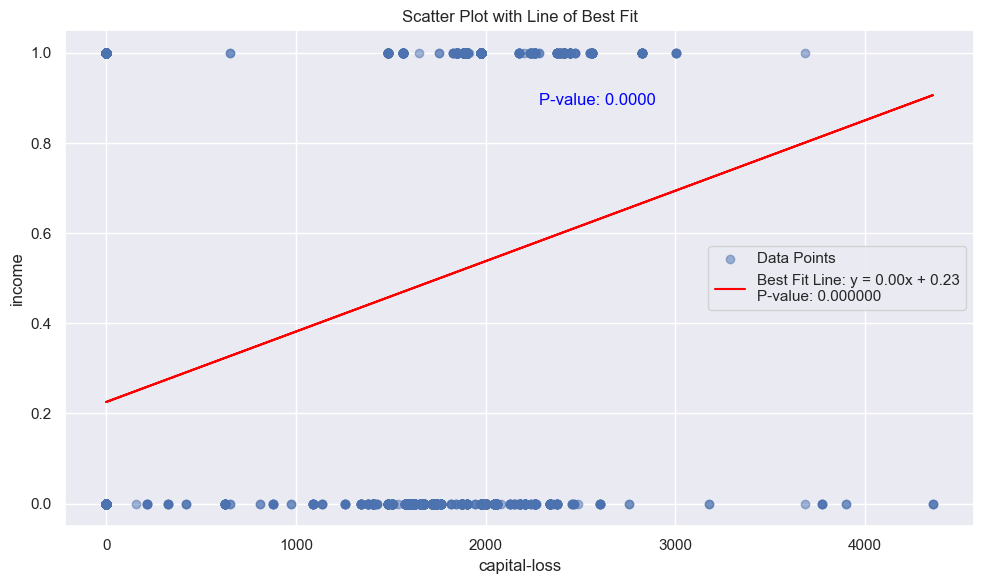

In [52]:
# Extracting the x and y values
x = adult_data['capital-loss']
y = adult_data['income']

# Performing linear regression using scipy's linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Creating the line of best fit equation
line_of_best_fit = f'Best Fit Line: y = {slope:.2f}x + {intercept:.2f}\nP-value: {p_value:.6f}'

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points', alpha=0.5)
plt.plot(x, slope * x + intercept, color='red', label=line_of_best_fit)
plt.xlabel('capital-loss')
plt.ylabel('income')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Annotate the p-value on the top right-hand side of the plot
plt.annotate(f'P-value: {p_value:.4f}', xy=(0.65, 0.85), xycoords='axes fraction', fontsize=12, color='blue', ha='right')

plt.show()

- ### Summary of a Linear Regression Analysis on capital-loss and income
    - The linear regression suggests a statistically significant but weak positive linear relationship between the two variables, with a slope of 0.000156 and an intercept of 0.226. The low r-value (correlation coefficient) indicates that the linear relationship isn't particularly strong.

## 5.5 Regression Analysis of Categorical Features 

**Note**: **ANOVA** (Analysis of Variance) will be used to compare means across different groups. In this case, will use ANOVA to compare the means of income across different levels of **workclass**, **education**, **occupation**, **marital-status**, **relationship**, **race**,**gender** and **native-country.** categories. If the ANOVA test indicates that there are significant differences in means among the groups, you can perform further post-hoc tests (e.g., Tukey's test) to identify which specific groups are significantly different from each other.

## 5.5.1 Workclass and Income 

### A. Distribution of workclass groups by income groups

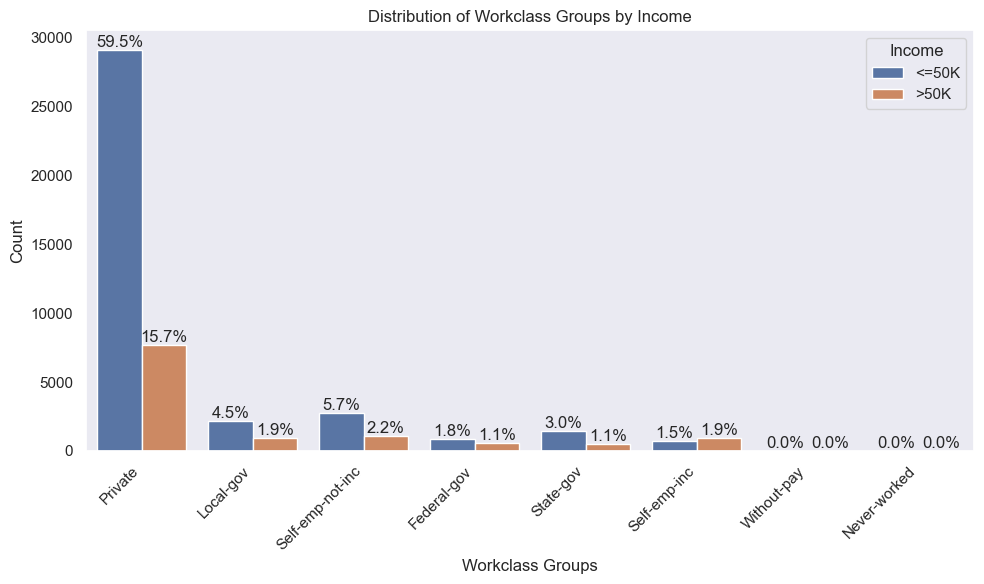

In [53]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Set the figure style to "dark"
sns.set_style("dark")

# Create a countplot
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='workclass', hue='income', data=adult_data)

# Add title and axis labels
plt.title("Distribution of Workclass Groups by Income")
plt.xlabel("Workclass Groups")
plt.ylabel("Count")

# Rename workclass tick labels for clarity
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title="Income", labels=["<=50K", ">50K"])

# Calculate and display percentages above each bar
total_counts = len(adult_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_counts)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()


### B. ANOVA Regression analysis examining the relationship between workclass and income.

In [54]:
from scipy.stats import f_oneway

# Set the significance (p-value) level
alpha = 0.05

# Perform ANOVA for workclass feature
workclass_groups = adult_data.groupby('workclass')['income'].apply(list)
anova_workclass = f_oneway(*workclass_groups)

print("Significance level (α):", alpha)

print("\nANOVA results for workclass:")
print("F-statistic:", anova_workclass.statistic)
print("P-value:", anova_workclass.pvalue)
if anova_workclass.pvalue < alpha:
    print("Null hypothesis rejected: There are significant differences in means across different workclass groups.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in means across different workclass groups.")


Significance level (α): 0.05

ANOVA results for workclass:
F-statistic: 205.14001114293592
P-value: 1.846577203354077e-301
Null hypothesis rejected: There are significant differences in means across different workclass groups.


- ### Summary of the ANOVA Regression Analysis for the Relationship between Workclass and Income
    - To summarize, the ANOVA results suggest that there are indeed significant differences in means across different workclass groups because of the extremely small p-value. Therefore, the null hypothesis is rejected, and it can be concluded that the workclass groups have statistically significant variations in their means.
    -The distrubtion of workclass groups by income also helps visualize the difference in means.The <=50K income group for the following workclass Private, Local-gov, self-emp-not-inc, Federal-gov, and State-gov have a higher mean that the >50K conuterparts. Conversely the opposite is true for the Self-emp-inc workclass.

### 5.5.2 education and income.

### A. Distribution of education groups by income groups

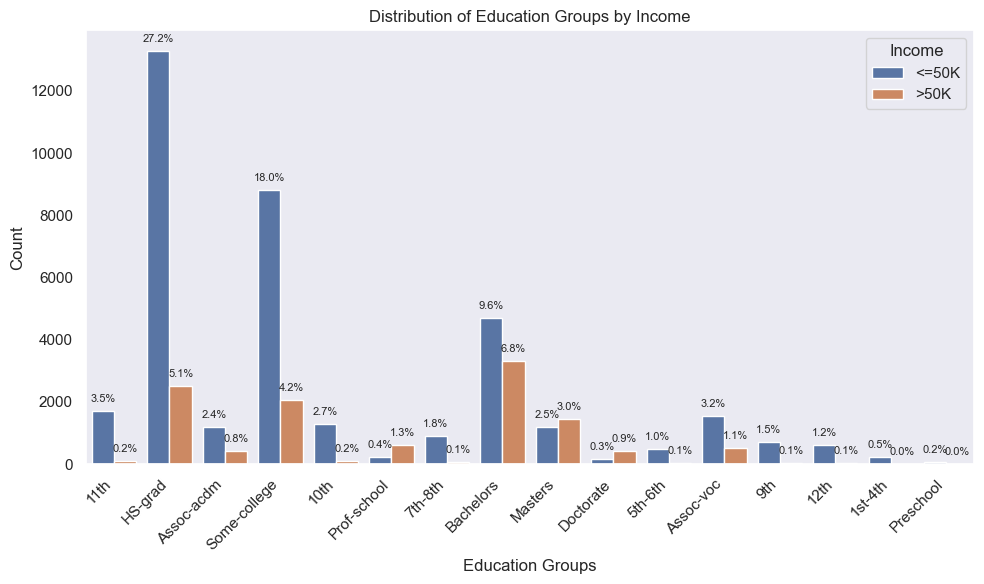

In [55]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Set the figure style to "dark"
sns.set_style("dark")

# Create a countplot
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='education', hue='income', data=adult_data)

# Add title and axis labels
plt.title("Distribution of Education Groups by Income")
plt.xlabel("Education Groups")
plt.ylabel("Count")

# Rename workclass tick labels for clarity
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title="Income", labels=["<=50K", ">50K"])

# Calculate and display percentages above each bar
total_counts = len(adult_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_counts)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8, xytext=(0, 5),
                textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()

### B. ANOVA Regression analysis examining the relationship between education and income.

In [56]:
from scipy.stats import f_oneway

# Set the significance (p-value) level
alpha = 0.05

# Perform ANOVA for education feature
education_groups = adult_data.groupby('education')['income'].apply(list)
anova_education = f_oneway(*education_groups)

print("Significance level (α):", alpha)

print("\nANOVA results for education:")
print("F-statistic:", anova_education.statistic)
print("P-value:", anova_education.pvalue)
if anova_education.pvalue < alpha:
    print("Null hypothesis rejected: There are significant differences in means across different education levels.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in means across different education levels.")


Significance level (α): 0.05

ANOVA results for education:
F-statistic: 503.0617495269706
P-value: 0.0
Null hypothesis rejected: There are significant differences in means across different education levels.


- ### Summary of the ANOVA Regression Analysis for the Relationship between education and Income
    - The ANOVA results conclude that there are statistically significant differences in means across different education levels. Except for Masters and Doctorate education levels, all other education levels in the <=50K income group have a higher mean than their counterparts in the >50K income group.
    - The p-value of 0.0 is below the significance level (α = 0.05), indicating extremely strong evidence against the null hypothesis. 

### 5.5.3 marital-status and income.

### A. Distribution of marital-status groups by income groups

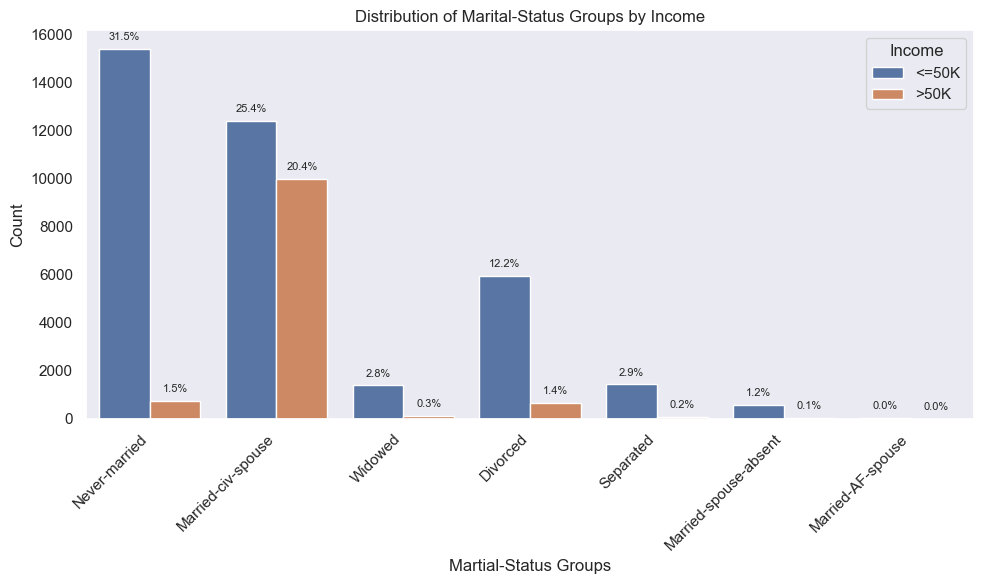

In [57]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Set the figure style to "dark"
sns.set_style("dark")

# Create a countplot
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='marital-status', hue='income', data=adult_data)

# Add title and axis labels
plt.title("Distribution of Marital-Status Groups by Income")
plt.xlabel("Martial-Status Groups")
plt.ylabel("Count")

# Rename workclass tick labels for clarity
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title="Income", labels=["<=50K", ">50K"])

# Calculate and display percentages above each bar
total_counts = len(adult_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_counts)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8, xytext=(0, 5),
                textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()

### B. ANOVA Regression analysis examining the relationship between martial-status and income.

In [58]:
from scipy.stats import f_oneway

# Set the significance (p-value) level
alpha = 0.05

# Perform ANOVA for marital-status feature
maritalstatus_groups = adult_data.groupby('marital-status')['income'].apply(list)
anova_maritalstatus = f_oneway(*maritalstatus_groups)

print("Significance level (α):", alpha)

print("\nANOVA results for marital-status:")
print("F-statistic:", anova_maritalstatus.statistic)
print("P-value:", anova_maritalstatus.pvalue)
if anova_maritalstatus.pvalue < alpha:
    print("Null hypothesis rejected: There are significant differences in means across different groups of marital-status.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in means across different groups of marital-status.")


Significance level (α): 0.05

ANOVA results for marital-status:
F-statistic: 2047.2047654174467
P-value: 0.0
Null hypothesis rejected: There are significant differences in means across different groups of marital-status.


- ### Summary of the ANOVA Regression Analysis for the Relationship between marital-status and Income
    - The ANOVA results show that there are statistically significant differences in means across different marital-status groups. All marital-status groups in the <=50K income group have a higher mean than their counterparts in the >50K income group. However, it should be noted that married-civ-spouse group has the highest number of married individuals making >50K showing that being married influences one's income.
    - The p-value of 0.0 is below the significance level (α = 0.05), indicating extremely strong evidence against the null hypothesis. 

### 5.5.4 occupation and income.

### A. Distribution of occupation groups by income groups

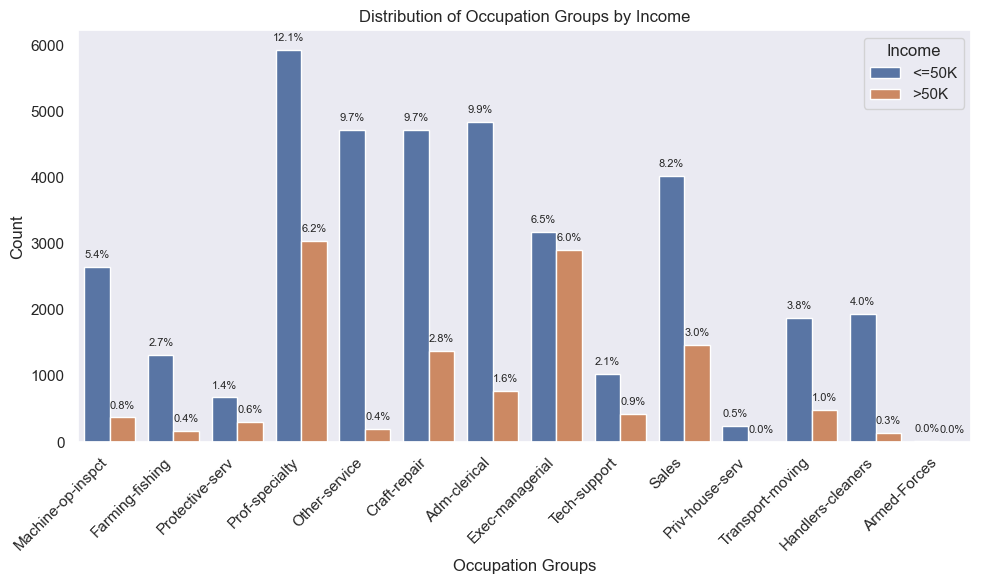

In [59]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Set the figure style to "dark"
sns.set_style("dark")

# Create a countplot
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='occupation', hue='income', data=adult_data)

# Add title and axis labels
plt.title("Distribution of Occupation Groups by Income")
plt.xlabel("Occupation Groups")
plt.ylabel("Count")

# Rename workclass tick labels for clarity
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title="Income", labels=["<=50K", ">50K"])

# Calculate and display percentages above each bar
total_counts = len(adult_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_counts)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8, xytext=(0, 5),
                textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()

### B. ANOVA Regression analysis examining the relationship between occupation and income.

In [60]:
from scipy.stats import f_oneway

# Set the significance (p-value) level
alpha = 0.05

# Perform ANOVA for marital-status feature
occupation_groups = adult_data.groupby('occupation')['income'].apply(list)
anova_occupation = f_oneway(*occupation_groups)

print("Significance level (α):", alpha)

print("\nANOVA results for occupation:")
print("F-statistic:", anova_occupation.statistic)
print("P-value:", anova_occupation.pvalue)
if anova_occupation.pvalue < alpha:
    print("Null hypothesis rejected: There are significant differences in means across different occupation groups.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in means across different occupation groups.")


Significance level (α): 0.05

ANOVA results for occupation:
F-statistic: 393.674984696702
P-value: 0.0
Null hypothesis rejected: There are significant differences in means across different occupation groups.


- ### Summary of the ANOVA Regression Analysis for the Relationship between occupation and Income
    - The ANOVA results reveal noteworthy differences in means among various occupation groups. It's unsurprising that white-collar roles like Exec-managerial and Prof-specialty exhibit a higher mean income (>50K) compared to other occupation groups within the same income bracket.
        - Interestingly, all occupation groups have individuals earning more than >50K, even in roles that don't typically demand high-level skills, such as handlers-cleaners.
    - With a p-value of 0.0 falling below the significance level (α = 0.05), there is exceptionally strong evidence against the null hypothesis.

### 5.5.5 relationship and income.

### A. Distribution of relationship groups by income groups

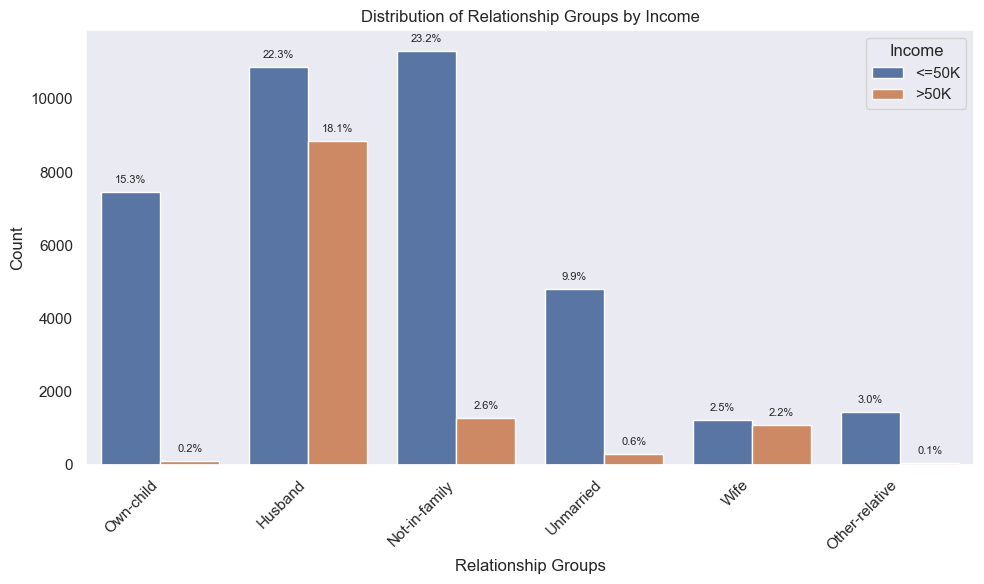

In [61]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Set the figure style to "dark"
sns.set_style("dark")

# Create a countplot
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='relationship', hue='income', data=adult_data)

# Add title and axis labels
plt.title("Distribution of Relationship Groups by Income")
plt.xlabel("Relationship Groups")
plt.ylabel("Count")

# Rename workclass tick labels for clarity
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title="Income", labels=["<=50K", ">50K"])

# Calculate and display percentages above each bar
total_counts = len(adult_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_counts)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8, xytext=(0, 5),
                textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()

### B. ANOVA Regression analysis examining the association between relationship and income.

In [62]:
from scipy.stats import f_oneway

# Set the significance (p-value) level
alpha = 0.05

# Perform ANOVA for marital-status feature
relationship_groups = adult_data.groupby('relationship')['income'].apply(list)
anova_relationship = f_oneway(*relationship_groups)

print("Significance level (α):", alpha)

print("\nANOVA results for relationship:")
print("F-statistic:", anova_relationship.statistic)
print("P-value:", anova_relationship.pvalue)
if anova_relationship.pvalue < alpha:
    print("Null hypothesis rejected: There are significant differences in means across different relationship groups.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in means across different relationship groups.")


Significance level (α): 0.05

ANOVA results for relationship:
F-statistic: 2542.7157814142224
P-value: 0.0
Null hypothesis rejected: There are significant differences in means across different relationship groups.


- ### Summary of the ANOVA Regression Analysis for the association between relationship and income
    - The ANOVA results indicate significant differences in means across various relationship groups. It's not surprising that the "husband" relationship group has the highest mean income (>50K) compared to other relationship groups within the same income category.
        - Interestingly, the "Not-in-family" group holds the second largest percentage of individuals earning more than >50K, as well as the largest number of individuals earning <=50K.
        - The "wife" relationship group stands out as the only category where the mean incomes for both the <=50K and >50K groups are almost comparable. This could be attributed to more women entering the workforce and acquiring skills that enable them to earn >50K.
    - The p-value of 0.0, which falls below the significance level (α = 0.05), provides remarkably strong evidence against the null hypothesis.

### 5.5.6 race and income.

### A. Distribution of race by income groups

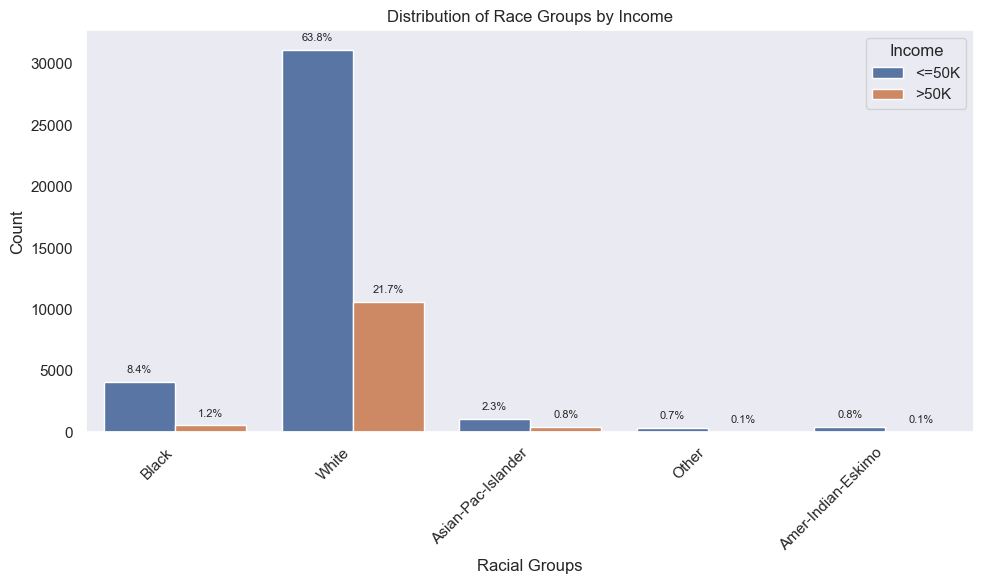

In [63]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Set the figure style to "dark"
sns.set_style("dark")

# Create a countplot
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='race', hue='income', data=adult_data)

# Add title and axis labels
plt.title("Distribution of Race Groups by Income")
plt.xlabel("Racial Groups")
plt.ylabel("Count")

# Rename workclass tick labels for clarity
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title="Income", labels=["<=50K", ">50K"])

# Calculate and display percentages above each bar
total_counts = len(adult_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_counts)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8, xytext=(0, 5),
                textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()

### B. ANOVA Regression analysis examining the relationship between race and income.

In [64]:
from scipy.stats import f_oneway

# Set the significance (p-value) level
alpha = 0.05

# Perform ANOVA for marital-status feature
race_groups = adult_data.groupby('race')['income'].apply(list)
anova_race = f_oneway(*race_groups)

print("Significance level (α):", alpha)

print("\nANOVA results for race:")
print("F-statistic:", anova_race.statistic)
print("P-value:", anova_race.pvalue)
if anova_race.pvalue < alpha:
    print("Null hypothesis rejected: There are significant differences in means across different racial groups.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in means across different racial groups.")


Significance level (α): 0.05

ANOVA results for race:
F-statistic: 122.97030141810873
P-value: 1.2939558467853694e-104
Null hypothesis rejected: There are significant differences in means across different racial groups.


- ### Summary of the ANOVA Regression Analysis for the relationship between race and income
    - The ANOVA results indicate significant statistical differences in means across various racial groups. It's unsurprising that the "white" racial group boasts the highest mean income compared to all other racial groups in the same category. 
        - The income means for the White population significantly surpass those of other racial groups.
        - Within the Black population, only 1.5% out of 9.9% and within the Asian-Pac-Islander population, only 0.8% out of 3.1% earn >50K. These percentages pale in comparison to the 21.7% of the White population making >50K. Evidently, a pronounced racial wealth gap exists not only among different racial groups, but also within the White racial group itself, with 63.8% earning <=50K compared to 21.7% earning >50K.
    - With a p-value of 0.0 falling below the significance level (α = 0.05), there is notably robust evidence against the null hypothesis.

### 5.5.7 gender and income.

### A. Distribution of gender  by income groups

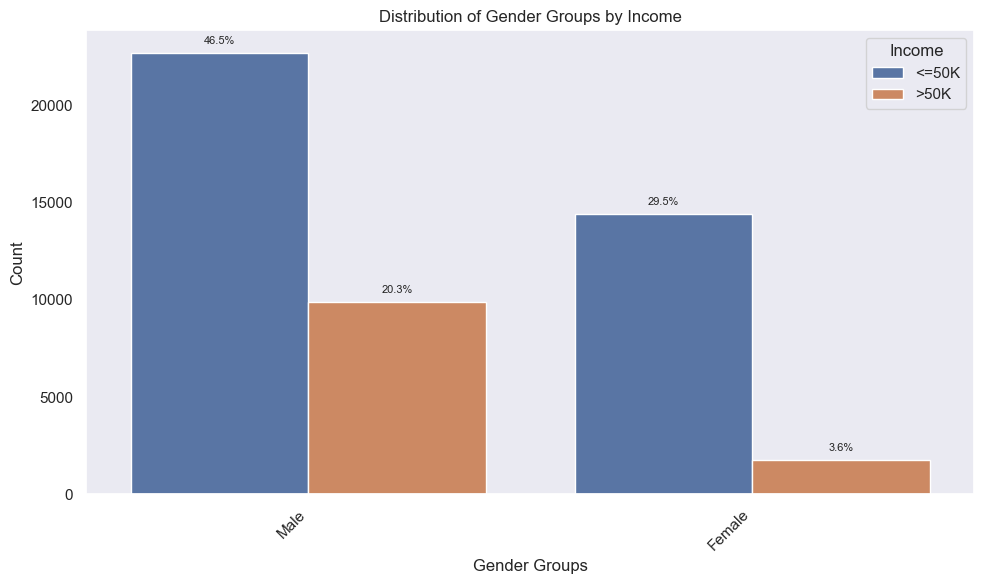

In [65]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Set the figure style to "dark"
sns.set_style("dark")

# Create a countplot
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='gender', hue='income', data=adult_data)

# Add title and axis labels
plt.title("Distribution of Gender Groups by Income")
plt.xlabel("Gender Groups")
plt.ylabel("Count")

# Rename workclass tick labels for clarity
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title="Income", labels=["<=50K", ">50K"])

# Calculate and display percentages above each bar
total_counts = len(adult_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_counts)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8, xytext=(0, 5),
                textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()

### B. ANOVA Regression analysis examining the relationship between gender and income.

In [66]:
from scipy.stats import f_oneway

# Set the significance (p-value) level
alpha = 0.05

# Perform ANOVA for marital-status feature
gender_groups = adult_data.groupby('gender')['income'].apply(list)
anova_gender = f_oneway(*gender_groups)

print("Significance level (α):", alpha)

print("\nANOVA results for gender:")
print("F-statistic:", anova_gender.statistic)
print("P-value:", anova_gender.pvalue)
if anova_gender.pvalue < alpha:
    print("Null hypothesis rejected: There are significant differences in means across different gender groups.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in means across different gender groups.")


Significance level (α): 0.05

ANOVA results for gender:
F-statistic: 2358.467288240302
P-value: 0.0
Null hypothesis rejected: There are significant differences in means across different gender groups.


- ### Summary of the ANOVA Regression Analysis for the relationship between gender and income
    - The ANOVA results indicates compelling evidence to reject the null hypothesis. 
        - Men make up 66.8% of the entire workforce compared to 33.1% of women.
        - Mean have a higher income mean for both income groups. 
            - 20.3% of mean earn >50K compared to only 3.6% of women.
            - 46.5% of mean earn <=50K compared to 29.5% of women
    - In summary, gender appears to have a statistically significant influence on the income.

### 5.5.8 native-country and income.

### A. Distribution of native countries  by income groups

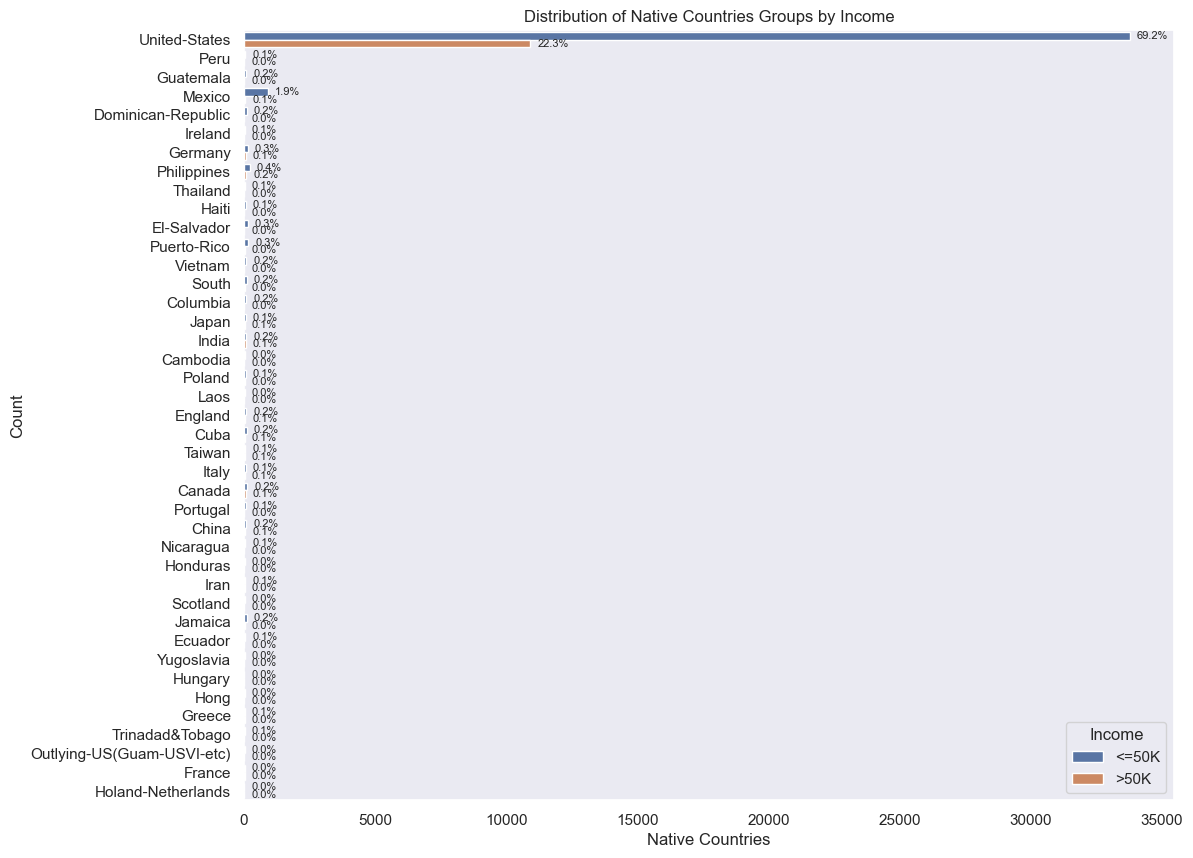

In [67]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Set the figure style to "dark"
sns.set_style("dark")

# Create a countplot
plt.figure(figsize=(12, 10))  # Increase figsize
ax = sns.countplot(y='native-country', hue='income', data=adult_data)

# Add title and axis labels
plt.title("Distribution of Native Countries Groups by Income")
plt.xlabel("Native Countries")
plt.ylabel("Count")

# Calculate and display percentages above each bar
total_counts = len(adult_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total_counts)  # Use get_width() for horizontal bars
    x = p.get_x() + p.get_width()  # Adjust x position
    y = p.get_y() + p.get_height() / 2  # Adjust y position
    ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=8, xytext=(5, 0),
                textcoords='offset points')

# Move legend to the bottom right-hand side
ax.legend(title="Income", labels=["<=50K", ">50K"], loc='lower right')

plt.show()


### B. ANOVA Regression analysis examining the relationship between native country and income.

In [68]:
from scipy.stats import f_oneway

# Set the significance (p-value) level
alpha = 0.05

# Perform ANOVA for marital-status feature
nativecountry_groups = adult_data.groupby('native-country')['income'].apply(list)
anova_nativecountry = f_oneway(*nativecountry_groups)

print("Significance level (α):", alpha)

print("\nANOVA results for native country:")
print("F-statistic:", anova_nativecountry.statistic)
print("P-value:", anova_nativecountry.pvalue)
if anova_nativecountry.pvalue < alpha:
    print("Null hypothesis rejected: There are significant differences in means across different native countries.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in means across different native countries.")


Significance level (α): 0.05

ANOVA results for native country:
F-statistic: 11.382753413288667
P-value: 1.8055852331214713e-71
Null hypothesis rejected: There are significant differences in means across different native countries.


- ### Summary of the ANOVA Regression Analysis for the relationship between native countries and income
    - The results of the ANOVA indicate compelling evidence to reject the null hypothesis. Specifically:
        - The United States exhibits the highest income mean across all listed countries and income groups.
        - Among the <=50K income group, Mexico, the nearest country in terms of income mean, has only 1.9% of individuals, in stark contrast to the USA's 69.2%.
        - It's important to acknowledge that this dataset is skewed towards the United States due to its origin in the 1994 Census. This skew might arise from potential underreporting by migrant communities or even complete absence of reporting.

## 6.0 Other Multivariate Analysis 

### A.   income, hours-per-week, gender

- ### How does gender influence the comparison between income and weekly working hours? 
    - Are there differences in earnings and hours worked for females compared to males?

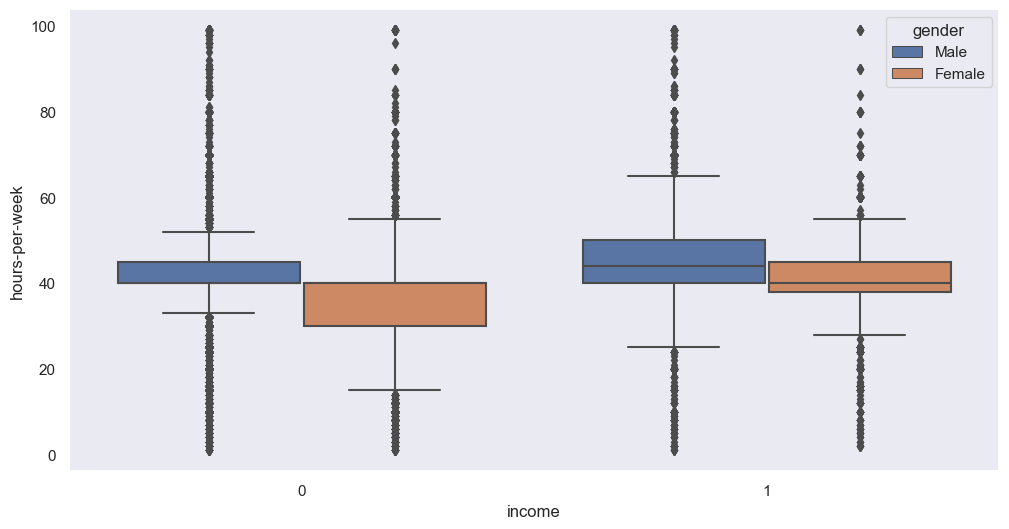

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='hours-per-week', hue='gender', data=adult_data )
plt.show()

### B. Boxplot analysis of  "income", "hours-per-week", "gender"

- The is a larger variance of females in the <=50K income group that males of the same income group.
- Males have a higher median than females in both income groups.
- Females work less weekly hours than males in both income groups. Maybe this is do do with child care therefore, they cannot work longer hours if they wanted or needed to.
- Males making >50K have a wider variance than makes making <=50K. 

### A.   income, gender, age

- ### How does age influence the comparison between income and gender? 
    - Are there differences in earnings for younger males and females compared to older males and females?

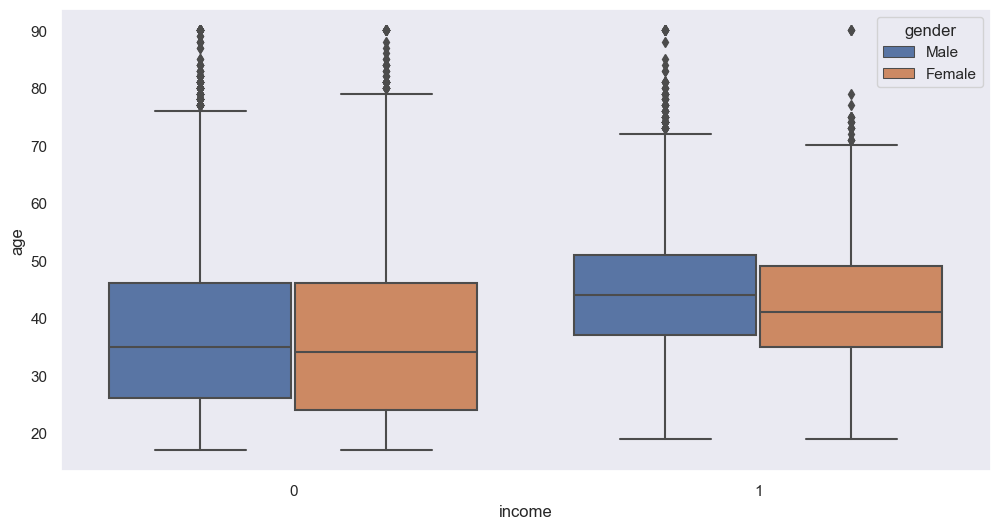

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='age', hue='gender', data=adult_data )
plt.show()

### B. Boxplot analysis of  "income", "age", "gender"

- Median "age" of Females who earn less than 50k is comparable the Median "age" of males who earn less than 50k.
- But the Median "age" of Females who earn greater than 50k is less than the Median "age" of males who earn greater than 50k.

## 7.0 Conclusion of EDA
 - The following are features that influenced the target variable(income):
    - Age 
    - Hours per week
    - capital-gain
    - capital-loss
    - workclass
    - Education
    - marital-status
    - occupation
    - relationship
    - race
    - gender
    - native-country
 - This data set is imbalanced. 
     - There are more individuals in the <=50K income group than in the >50K income group
     - There are more mean than women
     - There are more Whites than any other racial group
 - Generally:
     - Males  earn more than females in both income groups
     - Whites earn more than other other racial group
     - Higher Educational-levels (i.e. Masters and Doctorate) earn more than any other education-level in both income groups.
     - Married people earn more than any other marital-status group but only in the >50K income group
     - Professional specialiaties and exec-managerial occupations earn more than any other group but only in the >50K income group
- Interesingly: 
     -Females who earn less than 50k have a comparable the Median "age" of males who earn less than 50k.
     - The Median "age" of Females who earn greater than 50k is less than the Median "age" of males who earn greater than 50k.
     - The "wife" relationship group stands out as the only category where the mean incomes for both the <=50K and >50K groups are almost comparable. This could be attributed to more women entering the workforce and acquiring skills that enable them to earn >50K.